### Hyperparameter search or Hyperparameter optimization

    As we are dealing with many optimization algorithms, we ended up with needing to tune these many hyperparameters to find out the best combination of hyperparameters for our task. 
    
Some hyperaparameters are : $\alpha, \beta, \beta 1, \beta 2, \lambda, \epsilon, decayrate, numlayers, numhiddenunits, minibatchsize, numepochs$ 
    
    Increase in hyperparameters made this search for best hyperparameters pretty expensive. 
    
    In simple words, hyperparameter optimization is a technique that involves searching through a range of hyperparameter values to find a subset of results that achieve the best performance on a given dataset.
    
    There were two techniques that was used by practitioners initially for hyperparameter search    

#### Grid search and Random Search

##### Grid Search

    When performing hyperparameter optimization, we first need to define a parameter space or parameter grid, where we include a set of possible hyperparameter values that can be used to build the model.
    
    The grid search technique is then used to place these hyperparameters in a matrix-like/grid structure, and the model is trained on every combination of hyperparameter values.

    It is an "exhaustive search" that is performed on all the combination of given hyperparameter values of a model.
    
    Given a set of hyperparameters values, 
        
        Grid search would evaluate all possible combinations of the sets of values thus forming a grid of values. It basically tries out all the different combinations of hyperparameters for the model and place those performances on a grid.
        
        Based on the performance of the model on different combinations, it chooses the best model and thus the optimal hyperparameters are the hyperparameters of that model.
        
        One of the major drawbacks of grid search is that when it comes to its dimensionality, it suffers when the number of hyperparameters grows exponentially. With as few as four parameters this problem can become impractical, because the number of evaluations required for this strategy increases exponentially with each additional parameter, due to the curse of dimensionality.

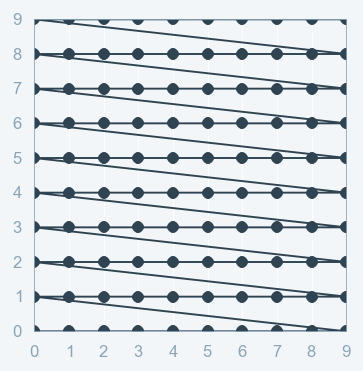

##### Random search

     Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model.
     
     Here as well, we specify the different hyperparamaters ranges we would want to use. 
    
    While grid search looks at every possible combination of these hyperparameters to find the best model, random search only selects and tests a random combination of hyperparameters.

    This technique randomly samples from a grid of hyperparameters instead of conducting an exhaustive search of trying out every single combination of hyperparameters.

    We can specify the number of total runs the random search should try before returning the best model.
    
    The chances of finding the optimal parameter are comparatively higher in random search because of the random search pattern where the model might end up being trained on the optimised parameters without any aliasing. In the paper Random Search for Hyper-Parameter Optimization by Bergstra and Bengio, the authors show empirically and theoretically that random search is more efficient for parameter optimization than grid search.
    
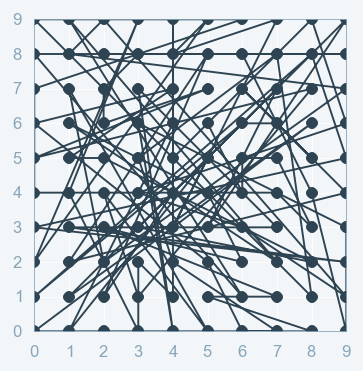

##### Grid Search vs Random Search - Which One To Use?

    Usually we know that few hyperparameters are more important than some.
    
    For eg, if we have 2 hypeparameters for which, both the random search and grid search is evaluating. 
    
    In those 2, one is an important hyperparamter (say learning_rate α) and the other is an unimportant parameter (say smoothing constant epsilon for adam/rmsprop). We know that epsilon barely matters and alpha matters a lot. Lets say we want to evaluate 5 values for each of these hyperparamters. So for all the combinations, we get a 5x5 grid of 25 different values.
    
    If we use grid search for these 2 parameters, we only assess 5 unique values of alpha (and epsilon) and thereby “lost an opportunity” to have 25 values of alpha (and epsilon) instead. Lets how is it the case.
    
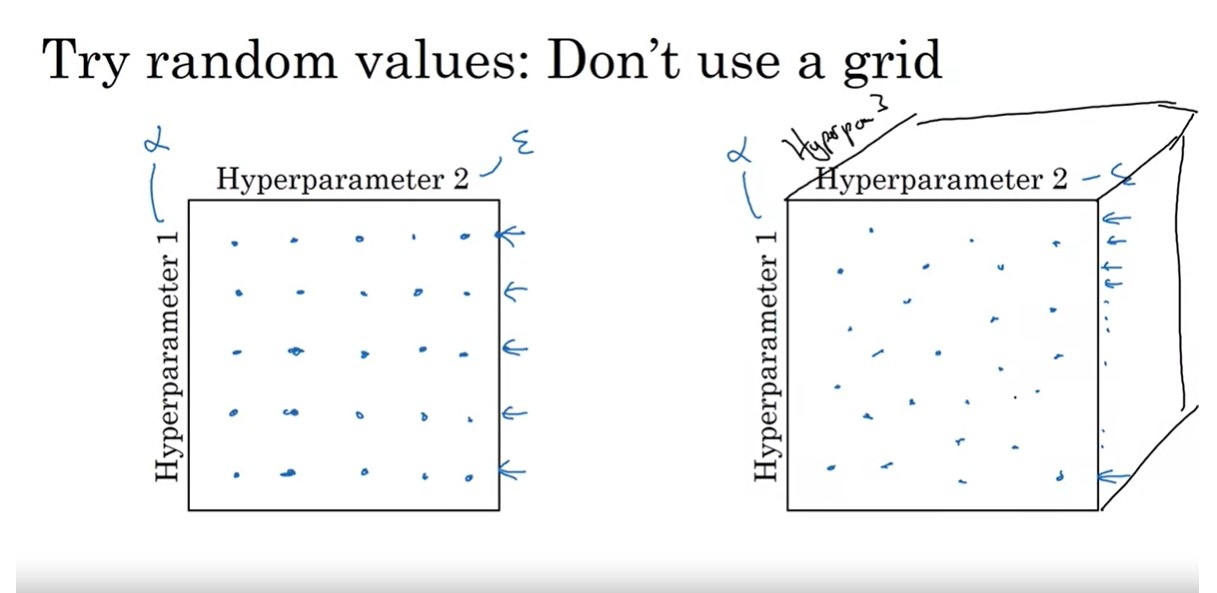
     
     In earlier generations of machine learning algorithms, if you had two hyperparameters, which I'm calling hyperparameter one and hyperparameter two here, it was common practice to sample the points in a grid like so, and systematically explore these values. Here we are placing down a five by five grid. In practice, it could be more or less than the five by five grid but you try out in this example all 25 points, and then pick whichever hyperparameter works best. 
     
     And this practice works okay when the number of hyperparameters was relatively small. In deep learning, what we tend to do, and what I recommend you do instead, is choose the points at "random". So go ahead and choose maybe of same number of points, 25 points at random, and then try out the hyperparameters on this randomly chosen set of points. And the reason you do that is that it's difficult to know in advance which hyperparameters are going to be the most important for your problem. 
     
    So if you sample in the grid then you've really tried out five values of alpha and you might find that all of the different values of epsilon give you essentially the same answer. So you've now trained 25 models and only got into trial five values for the learning rate alpha. Whereas in contrast, if you were to sample at random, then you will have tried out 25 distinct values of the learning rate alpha and therefore you be more likely to find a value that works really well.
    
    I've explained this example, using just two hyperparameters. In practice, you might be searching over many more hyperparameters than these, so if you have, say, three hyperparameters, I guess instead of searching over a square, you're searching over a cube where this third dimension is hyperparameter three and then by sampling within this three-dimensional cube you get to try out a lot more values of each of your three hyperparameters. And in practice you might be searching over even more hyperparameters than three and sometimes it's just hard to know in advance which ones turn out to be the really important hyperparameters for your application and sampling at random rather than in the grid shows that you are more richly exploring set of possible values for the most important hyperparameters, whatever they turn out to be.
    
    When you sample hyperparameters, another common practice is to use a coarse to fine sampling scheme which we ll discuss later below.


     If you ever find yourself trying to choose between grid search and random search, here are some pointers to help you decide which one to use:

- Use grid search if you already have a ballpark(small) range of known hyperparameter values that will perform well. Make sure to keep your hyperparameter space small, because grid search can be extremely time-consuming.

- Use random search on a broad range of values if you don’t already have an idea of the hyperparameters that will perform well on your model. Random search is faster than grid search and should always be used when you have a large hyperparameter space.
    
      It is also a good idea to use both random search and grid search to get the best possible results.

- Initially when you dont know the small range of hyperparameters in advance(may be based on your experience), then you can use random search first with a large parameter space since it is faster. Then, use the best hyperparameters found by random search to narrow down the parameter grid, and feed a smaller range of values to grid search. This technique is also called coarse to fine search
    
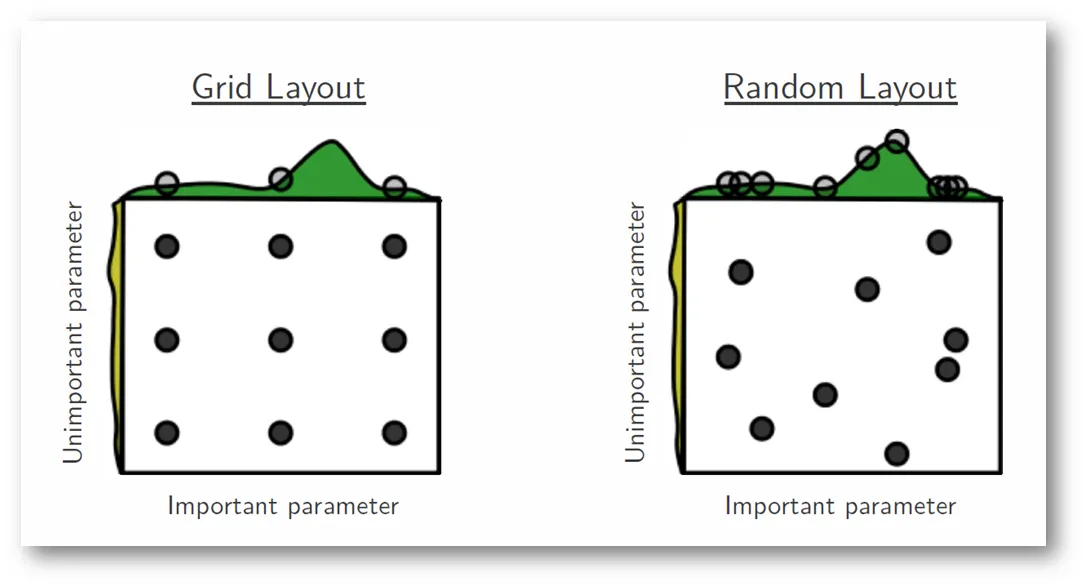

 https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318

#### Coarse to Fine Search

    Coarse search represents larger hyperparameter space where will have large range of values for each hyperparamter that we want to search for. So, in that case, always use random search as it is not performing exhaustive search. Once the best hyperparamters are found, then use these smaller hyperparameters range found in random search and pass this to the grid search so that it will try out all combinations of these smaller range of hyperparamters and find out the best hyperparameters of this fine region. Think of it as zooming in the hyperparaters region from overall coarse region to fine region where the best hyperparameters are found in coarse region.

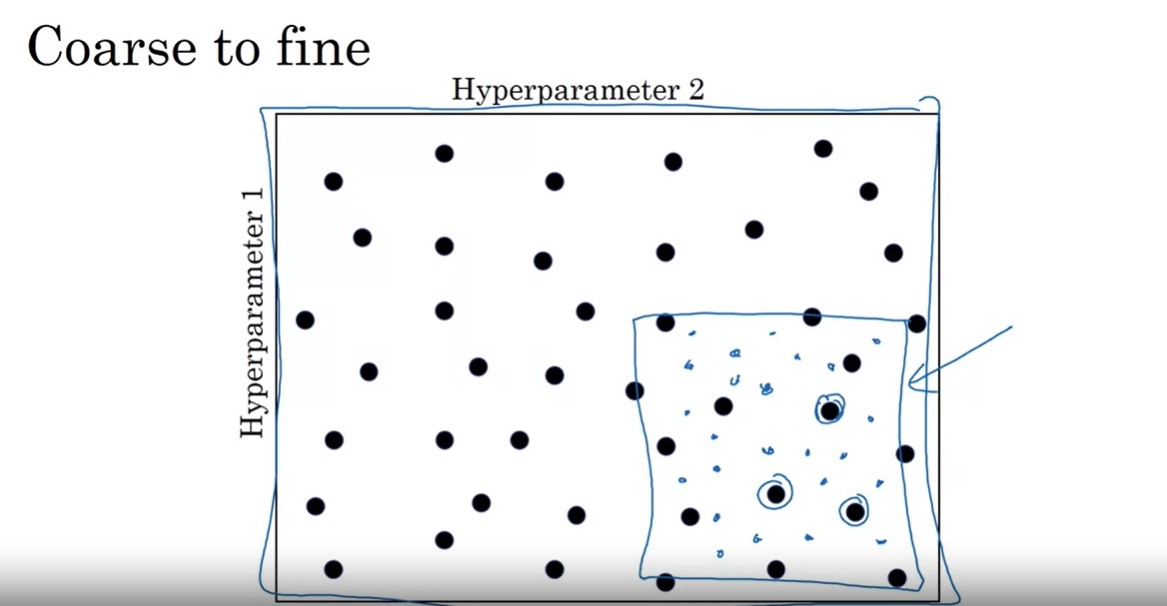

    For example, let's say in this two-dimensional example(2 hyperparameters search) that you sample these points(bigger square), and maybe you found that this point(any circled blue) work the best and maybe a few other points around it tended to work really well, then in the course to fine scheme, what you might do is zoom in to a smaller region of the hyperparameters(smaller square below right), and then sample more densely within this space. Or maybe again at random, but to then focus more resources on searching within this blue square if you're suspecting that the best setting, the hyperparameters, may be in this region. 
    
    So after doing a coarse sample of this entire square, that tells you to then focus on a smaller square. You can then sample more densely into smaller square. So this type of a coarse to fine search is also frequently used. And by trying out these different values of the hyperparameters you can then pick whatever value allows you to do best on your training set objective, or does best on your development set, or whatever you're trying to optimize in your hyperparameter search process. 
    
    So I hope this gives you a way to more systematically organize your hyperparameter search process. The two key takeaways are, use random sampling and adequate search and optionally consider implementing a coarse to fine search process. 
    
Code example: for coarse to fine: https://www.kdnuggets.com/2022/10/hyperparameter-tuning-grid-search-random-search-python.html#:~:text=While%20grid%20search%20looks%20at,of%20conducting%20an%20exhaustive%20search.
    

### Bayesian search
    Bayesian search is also another powerful hyperparameter search technique.
    
    The main difference between Bayesian search and the other methods is that the tuning algorithm optimizes its parameter selection in each round according to the previous round score. Thus, instead of randomly choosing the next set of parameters, the algorithm optimizes the choice, and likely reaches the best parameter set faster than the previous two methods. Meaning, this method chooses only the relevant search space and discards the ranges that will most likely not deliver the best solution. Thus, it can be beneficial when you have a large amount of data, the learning is slow, and you want to minimize the tuning time.

code example: https://towardsdatascience.com/bayesian-optimization-for-hyperparameter-tuning-how-and-why-655b0ee0b399

    But there's even more to hyperparameter search than this which is, how to choose the right scale on which to sample your hyperparameters.

### Using appropriate scale for hyperparamers

    Till now , we saw how sampling at random, over the range of hyperparameters, can allow you to search over the space of hyperparameters more efficiently. But it turns out that sampling at random doesn't mean sampling uniformly at random, over the range of valid values. (see below cell for more on sampling at random, sampling at uniformly random)
    
    Instead, it's important to pick the appropriate scale on which to explore the hyperparameters. 
    
    Let's say that you're trying to choose the number of hidden units, n[l], for a given layer l. And let's say that you think a good range of values is somewhere from 50 to 100. In that case, if you look at the number line from 50 to 100, maybe picking some number values at random within the number line. There's a pretty visible way to search for this particular hyperparameter. 
    
    Or if you're trying to decide on the number of layers in your neural network, we're calling that capital L. Maybe you think the total number of layers should be somewhere between 2 to 4. Then sampling uniformly at random, along 2, 3 and 4, might be reasonable. Or even using a grid search, where you explicitly evaluate the values 2, 3 and 4 might be reasonable. So these were a couple examples where sampling uniformly at random over the range you're contemplating might be a reasonable thing to do. 
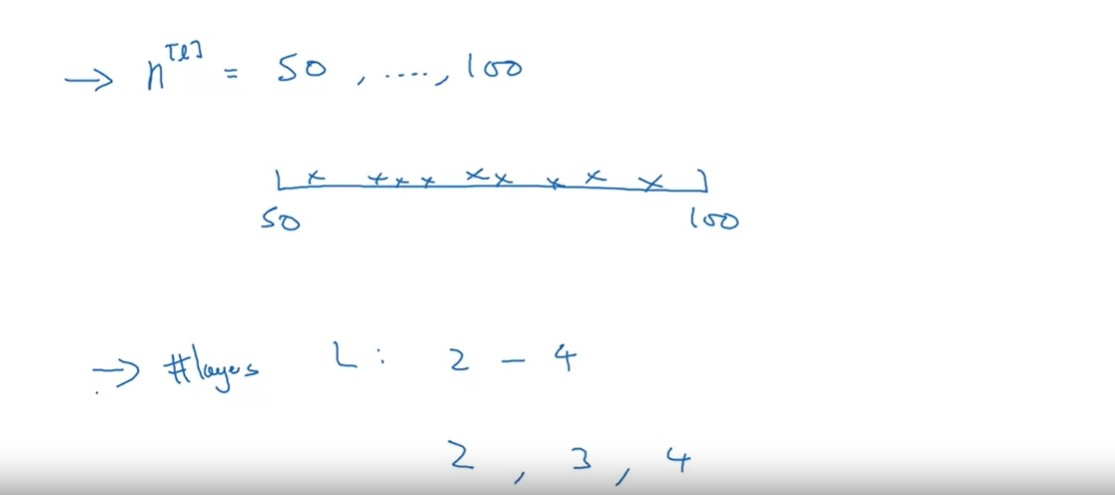    

    But this is not true for all hyperparameters. Let's look at another example. 
    
    Say your searching for the hyperparameter alpha, the learning rate. And let's say that you suspect 0.0001 might be on the low end, or maybe it could be as high as 1. Now if you draw the number line from 0.0001 to 1, and sample values uniformly at random over the number line. Well, about 90% of the values you sample would be between 0.1 and 1. So you're using 90% of the resources to search between 0.1 and 1, and only 10% of the resources to search between 0.0001 and 0.1. 
    
    10% is just the probability of getting a value between 0 and 0.1 if you sample uniformly between 0 and 1.

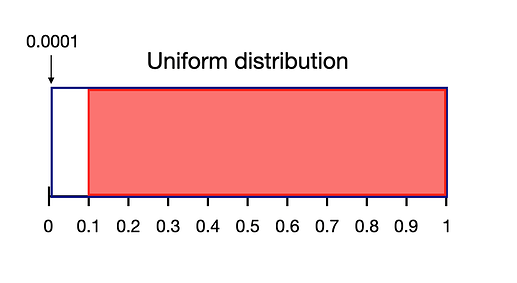

So that doesn't seem right.

Instead, it seems more reasonable to search for hyperparameters on a log scale. Lets see how transforming the scale of the hyperparameter to log scale helps in better sampling even it is uniformly at random i,e how changing the scale to log scale helps in allocating more rescources or probability for values between 0.0001 and 0.1?
    
    So in Python, the way you implement this is,
    
$r = a * np.random.rand() + b$ where $r\in[a, b]$,  a <= r <= b, uniformly at random, 

r will be a random number between a and b.

And then a randomly chosen value of our hyperparameter would be, hyperparameter = $10^r$

    Here a and b are upper and lower ranges of the hyperparameters in log scale. 

For our example , r = -4 * np.random.rand() where $r\in[-4, 0]$

**How to calculate a and b after tranforming the hyperparameters values into log scale? **
    
    We know for our example, the lower value in original scale(linear scale) is 0.0001 and upper value in 1

    So if the lower value of our hyperparameter is 0.0001, the in log scale you can write it as log 0.0001 = log 10^-4 = -4 . This is the value of a. So a=-4 
    
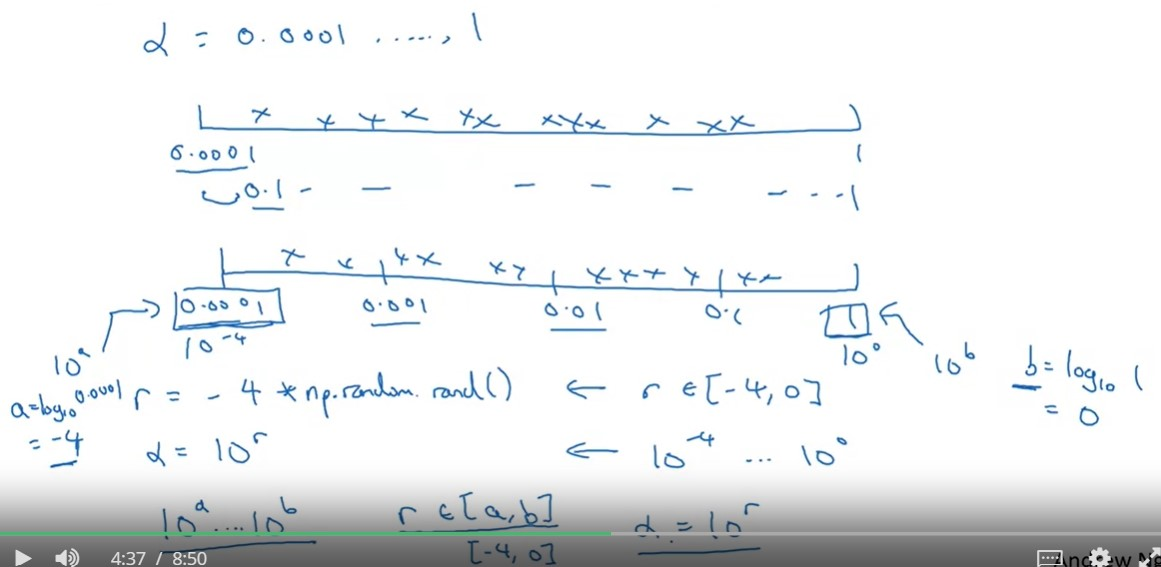
    
    

    So if the upper value of our hyperparameter is 1, the in log scale you can write it as log 1 = log 10^0 = 0 .This is the value of b. So b=0  
    
    So after this line r = -4 * np.random.rand(), r will be a random number between -4 and 0
     
    Now, r = -4 * np.random.rand().
    
   

    r now can be any uniform random value between a and b i.e here betwee -4 and 0.
    
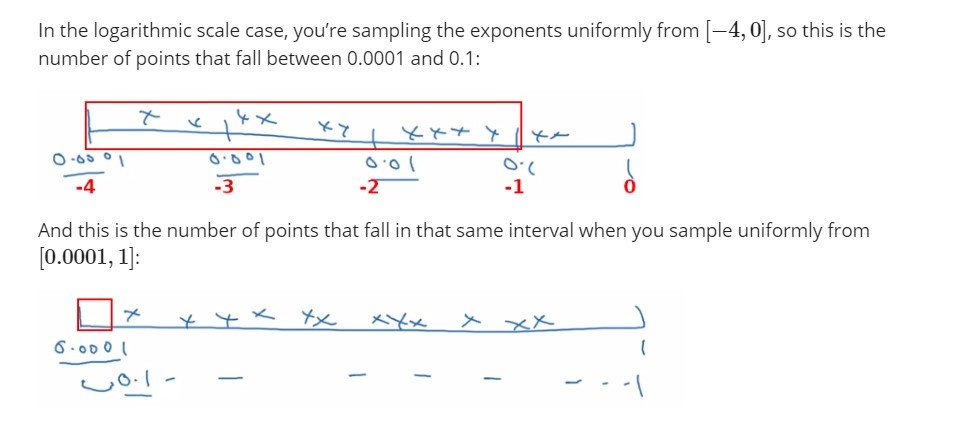
    
    i.e we pick any r from a number line [-4 -3 -2 -1 0] i.e we sample from this unformly random distribution where every value has equal probability of pickup.
     
So, after choosing r, then a randomly chosen value of alpha would be, $\alpha = 10^r$

If we make r in terms of $\alpha$, we will have $\alpha$ between $[10^{-4}, 10^0] => [10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 10^0] = [0.0001, 0.001, 0.01, 0.1, 0]$

In a more general case, if you're trying to sample between $10^a$, to $10^b$, on the log scale. So what you do, is then sample r uniformly, at random, between a and b. So in this case, r would be between -4 and 0. And you can set alpha, on your randomly sampled hyperparameter value, as $10^r$.

So just to recap, to sample on the log scale, you take the low value, take logs to figure out what is a. Take the high value, take a log to figure out what is b. So now you're trying to sample, from $10^a$ to the $10^b$, on a log scale. So you set r uniformly, at random, between a and b. And then you set the hyperparameter to be $10^r$. So that's how you implement sampling on this logarithmic scale. 

Where instead of using a linear scale, you'd have 0.0001, 0.001, 0.01, 0.1, and then 1. And you instead sample uniformly, at random, on this type of logarithmic scale. Now you have more resources dedicated to searching between 0.0001 and 0.001, and between 0.001 and 0.01, and so on.

------


Finally, one other tricky case is sampling the hyperparameter $\beta$, used for computing exponentially weighted averages. 

So let's say you suspect that beta should be somewhere between 0.9 to 0.999. Maybe this is the range of values you want to search over. 

So remember, that when computing exponentially weighted averages, using 0.9 is like averaging over the last 10 values (1/1-$\beta$). Its kind of like taking the average of 10 days temperature, whereas using 0.999 is like averaging over the last 1,000 values.

So similar to what we saw before, if you want to search between 0.9 and 0.999, it doesn't make sense to sample on the linear scale, right? Uniformly, at random, between 0.9 and 0.999.

So the best way to think about this, is that we want to explore the range of values for 1 - $\beta$, which is going to now range from 0.1 to 0.001 => [(1-0.9) to (1-0.999)]. 
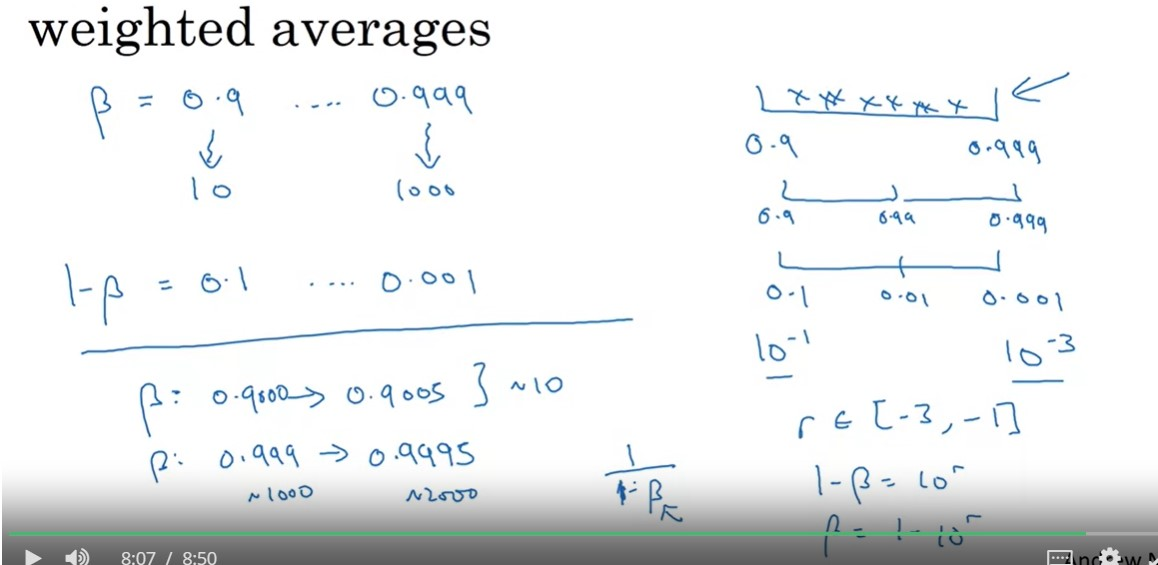

And so we'll sample the between $\beta$, taking values from 0.1 to 0.001. So using the method we have figured out already, that 0.1 is $10^{-1}$ to $10^{-3}$. 

Notice in the previous explanation, we had the small value on the left, and the large value on the right, but here we have reversed. We have the large value on the left, and the small value on the right. So what you do, is you sample r uniformly, at random, from -3 to -1. 

And you set $1- \beta = 10^r$,

=> $\beta = 1- 10^r$. 

And this becomes your randomly sampled value of your hyperparameter $\beta$, chosen on the appropriate scale.

And in that this way, you spend as much resources exploring the range 0.9 to 0.99, as you would exploring 0.99 to 0.999. 

So if you want to study more formal mathematical justification for why we're doing this, why is it such a bad idea to sample in a linear scale?
    
It is that, when $\beta$ is close to 1, the sensitivity of the results you get changes, even with very small changes to $\beta$. So if beta goes from 0.9 to 0.9005, it's no big deal, this is hardly any change in your results. But if beta goes from 0.999 to 0.9995, this will have a huge impact on exactly what your algorithm is doing. 

    In both of these cases of $\beta$ = 0.9 and $\beta$ = 0.9005, it's averaging over roughly 10 values. 
    
    But for 0.999 to 0.9995, it's gone from an exponentially weighted average over about the last 1,000 examples, to now, the last 2,000 examples. And it's because that formula we have, 1 / 1- $\beta$, this is very sensitive to small changes in beta, when beta is close to 1. 
    
    So what this whole sampling process does, is it causes you to sample more densely in the region of when $\beta$ is close to 1. Or, alternatively, when 1- $\beta$ is close to 0 so that you can be more efficient in terms of how you distribute the samples, to explore the space of possible outcomes more efficiently.
    
    So I hope this helps you select the right scale on which to sample the hyperparameters.
    
    In case you don't end up making the right scaling decision on some hyperparameter choice, don't worry to much about it. Even if you sample on the uniform scale, where sum of the scale would have been superior, you might still get okay results. Especially if you use a coarse to fine search, so that in later iterations, you focus in more on the most useful range of hyperparameter values to sample. I hope this helps you in your hyperparameter search.
    
    Now, I also want to share with you some thoughts of how to organize your hyperparameter search process. That I hope will make your workflow a bit more efficient.

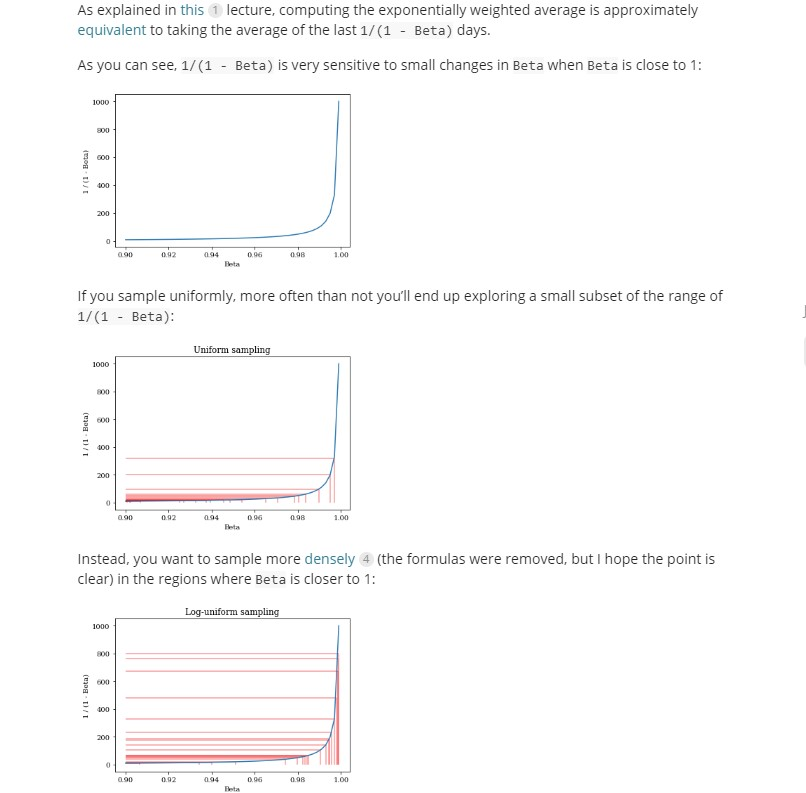

##### Info: Sampling at random, sampling at uniformly random

    Sampling at random" and "sampling at uniformly random" are terms that are often used interchangeably, but they can have slightly different interpretations depending on the context. Here's a breakdown of the differences:

**Sampling at Random:**
- Random Selection: 

        When you sample at random, you are selecting items or data points in a way that is not deterministic or predictable. Each item or data point has an equal chance of being selected, but the selection process itself might not be uniform.

- No Prescribed Order: 
        
        Random sampling doesn't specify a particular order or pattern for selecting items. It may involve using random number generators or other randomization techniques to make selections.

**Sampling at Uniformly Random:**

- Uniform Distribution: 

        Sampling at uniformly random means that the probability of selecting each item or data point is precisely the same for all items. In other words, the selection process follows a uniform probability distribution.

- Equal Probability: 

        When you sample at uniformly random, there is an explicit emphasis on ensuring that each item is selected with equal probability. This is often achieved by using randomization methods that guarantee uniformity.

    
        In many practical scenarios, the distinction between "random" and "uniformly random" might not matter, and people use these terms interchangeably. However, in situations where precise control over the selection process and equal probabilities are essential, the term "uniformly random" is used to emphasize the uniformity of the sampling process.

        For example, when selecting random samples from a population for a statistical survey, you typically want each member of the population to have an equal chance of being included. In this case, you would aim for "uniformly random" sampling to ensure fairness.

        In summary, "sampling at random" implies randomness in the selection process, while "sampling at uniformly random" explicitly emphasizes that each item is selected with equal probability, following a uniform distribution.

#### Pandas and caviar methods for organization ofhyperparameter search 

    You have now heard a lot about how to search for good hyperparameters. Before wrapping up our discussion on hyperparameter search, I want to share with you just a couple of final tips and tricks for how to organization of your hyperparameter search process.
    
     In terms of how people go about searching for hyperparameters organization, I see maybe two major schools of thought, or maybe two major different ways in which people go about it.
    
    The 2 ways are pandas way and caviar way. 
    
    For Pandas method imagine a lazy panda. For caviar process imagine fish caviar.
    
    In pandas method, we develop one model with some random hyperparamters and we keep on improving this model day by day by adding or changing the hyperparameters over time. Imagine how panda gives birth to one or 2 children and keeps looking after them/babysit them up until they survive.
    
       This way works as if you babysit one model. And usually you do this if you have maybe a huge data set but not a lot of computational resources, not a lot of CPUs and GPUs, so you can basically afford to train only one model or a very small number of models at a time. In that case you might gradually babysit that model even as it's training. So, for example, on Day 0 you might initialize your parameter as random and then start training. And you gradually watch your learning curve, maybe the cost function J or your dataset error or something else, gradually decrease over the first day. Then at the end of day one, you might say, gee, looks it's learning quite well, I'm going to try increasing the learning rate a little bit and see how it does. And then maybe it does better. And then that's your Day 2 performance. And after two days you say, okay, it's still doing quite well. Maybe I'll fill the momentum term a bit or decrease the learning variable a bit now, and then you're now into Day 3. And every day you kind of look at it and try nudging up and down your parameters. And maybe on one day you found your learning rate was too big. So you might go back to the previous day's model, and so on. But you're kind of babysitting the model one day at a time even as it's training over a course of many days or over the course of several different weeks. So that's one approach, and people that babysit one model, that is watching performance and patiently nudging the learning rate up or down. But that's usually what happens if you don't have enough computational capacity to train a lot of models at the same time.
    
    In Caviar method, given you have required computational capabilities, we will develop several model with different hyperaparameters and let them run in parallel. We will choose one best model among them. Think of how fish will lay 1000's of eggs and leave them off and hoping to see atleast one will get better unlike panda. 
    
    In this caviar approach, you train many models in parallel. So you might have some setting of the hyperparameters and just let it run by itself ,either for a day or even for multiple days, and then you get some learning curve like in blue; and this could be a plot of the cost function J or cost of your training error or cost of your dataset error, but some metric in your tracking. And then at the same time you might start up a different model with a different setting of the hyperparameters. And so, your second model might generate a different learning curve, maybe one that looks like yellow. And at the same time, you might train a third model, which might generate a learning curve that looks like blue, and another one that, maybe this one diverges so it looks like that, and so on. Or you might train many different models in parallel, where these orange lines are different models, right, and so this way you can try a lot of different hyperparameter settings and then just maybe quickly at the end pick the one that works best.

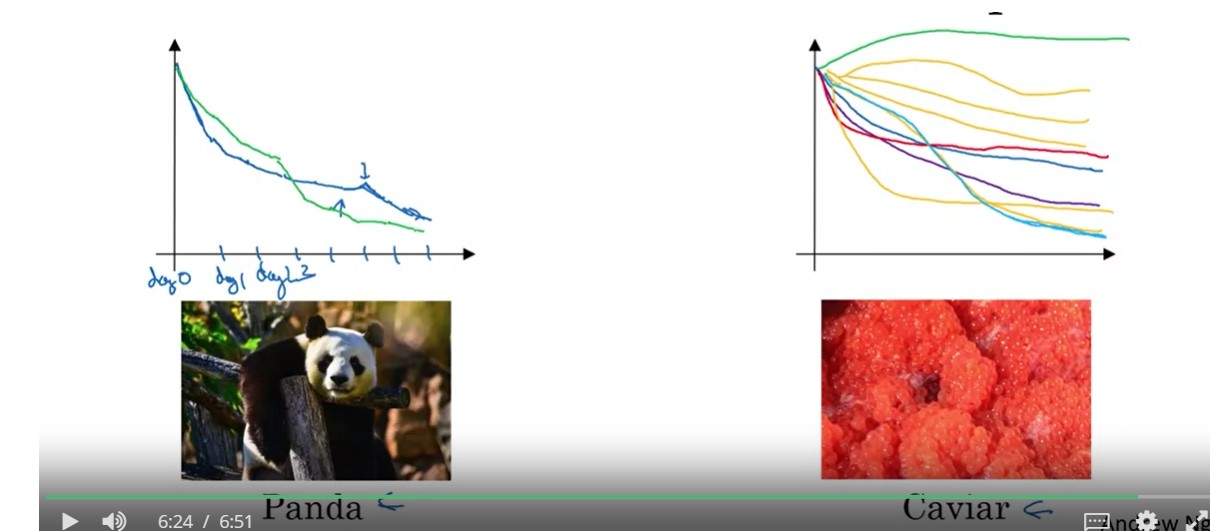    

    So to make an analogy, I'm going to call the approach on the left the panda approach. When pandas have children, they have very few children, usually one child at a time, and then they really put a lot of effort into making sure that the baby panda survives. So that's really babysitting. One model or one baby panda. Whereas the approach on the right is more like what fish do. I'm going to call this the caviar strategy. There's some fish that lay over 100 million eggs in one mating season. But the way fish reproduce is they lay a lot of eggs and don't pay too much attention to any one of them but just see that hopefully one of them, or maybe a bunch of them, will do well. 
    
     So the way to choose between these two approaches is really a function of how much computational resources you have. If you have enough computers to train a lot of models in parallel, then by all means take the caviar approach and try a lot of different hyperparameters and see what works. But in some application domains, I see this in some online advertising settings as well as in some computer vision applications, where there's just so much data and the models you want to train are so big that it's difficult to train a lot of models at the same time. It's really application dependent of course, but I've seen those communities use the panda approach a little bit more, where you are kind of babying a single model along and nudging the parameters up and down and trying to make this one model work. 
     
     Although, of course, even the panda approach, having trained one model and then seen it work or not working, maybe in the second week or the third week, maybe I should initialize a different model and then baby that one along just like even pandas, I guess, can have multiple children in their lifetime, even if they have only one, or a very small number of children, at any one time. So hopefully this gives you a good sense of how to go about the hyperparameter search process. 
    
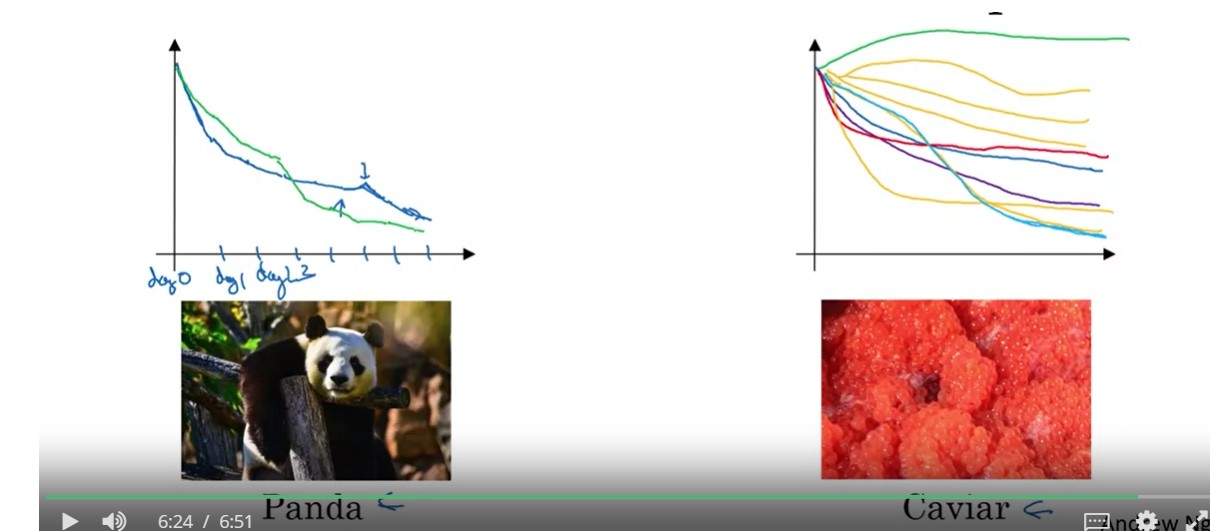

    Now, it turns out that there's one other technique that can make your neural network much more robust to the choice of hyperparameters. It doesn't work for all neural networks, but when it does, it can make the hyperparameter search much easier and also make training go much faster. Let's talk about this technique in the next video.

### Batch Normalization
    In the first week of this course, we saw normalization of input as a technique for better and fast optimization. In Deep Neural Networks as well we will normalize the input usually to have 0 mean and unit sd. But what if we want to normalize the inputs of hidden layers? This is nothing but Batch Normalization. 
    
    Every hidden layer inputs which are previous layers output activations are normalized so that all the hidden layers will also get normalized inputs with some mean and variance(can be 0 and 1 or some different values) We ll discuss more on batch normalization later.
    
    In the rise of deep learning, one of the most important ideas has been an algorithm called batch normalization, created by two researchers, Sergey Ioffe and Christian Szegedy. Batch normalization makes your hyperparameter search problem much easier, makes your neural network much more robust. The choice of hyperparameters is a much bigger range of hyperparameters that work well, and will also enable you to much more easily train even very deep networks. Let's see how batch normalization works. 
    
    When training a model, such as logistic regression, you might remember that normalizing the input features can speed up learnings.
    
    We make the training data, mean centered and unit standard deviation by computing the means and subtracting off the mean from your training set X, computing the variances which sum of xi (=>xi-mu) squared( element-wise squaring)
    
$ X_i = X_i-\mu$

$\sigma^2 = \Sigma_{i=1}^{n} X_i^2$
    
$ X_{scaled} = \frac {X_i}{\sqrt{\sigma^2}} = \frac {X_i}{\sigma}$

    And then normalize your data set. And we saw in an earlier lectures how this can turn the contours of your learning problem from something that might be very elongated to something that is more round, and easier for an algorithm like gradient descent to optimize. So this works, in terms of normalizing the input feature values to a neural network.
    
    
    

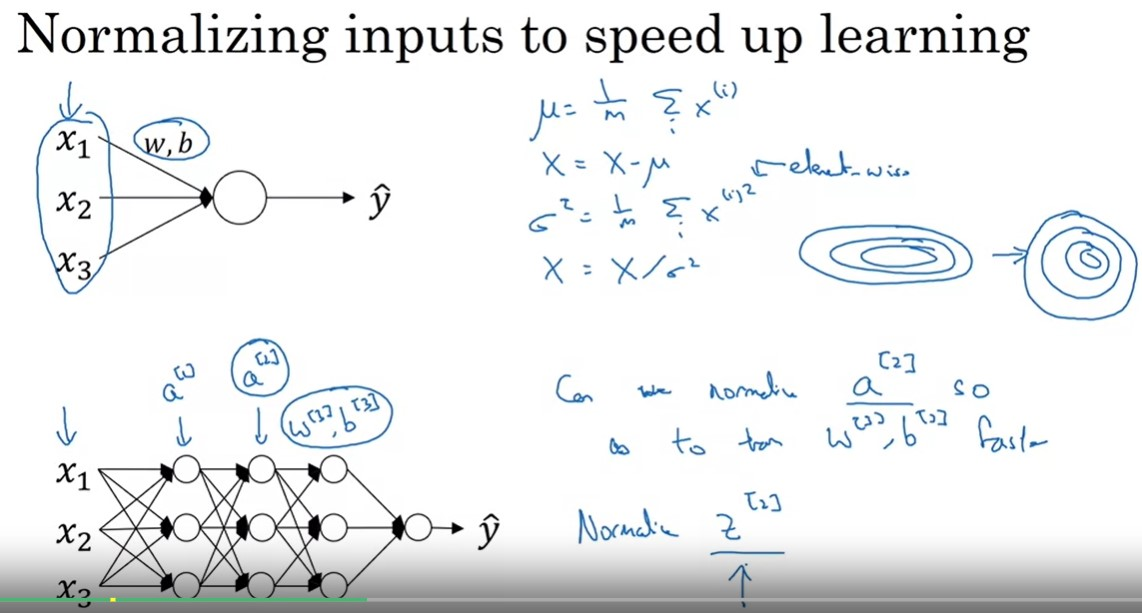

    Now, how about a deeper model? You have not just input features x, but you will have layers l1 with activations a1, l2 with activations a2 and so on. Say, if you want to train the parameters for layer 3, => w3, b3, then wouldn't it be nice if you can normalize the mean and variance of a2 to make the training of w3, b3 more efficient? Since a2 is the input to the next layer, that therefore affects your training of w3 and b3.
    
    In the case of logistic regression, we saw how normalizing x1, x2, x3 maybe helps you train w and b more efficiently. So here, the question is, for any hidden layer, can we normalize the values of a, let's say a2, in this example but really any hidden layer, so as to train w3 b3 faster? 

    So this is what batch norm does, batch normalization, or batch norm for short, does.
    
    Although technically, we'll actually normalize the values of not a2 but z2. There are some debates in the deep learning literature about whether you should normalize the value before the activation function, so z2, or whether you should normalize the value after applying the activation function, a2. In practice, normalizing z2 is done much more often. So that's the version I'll present and what I would recommend you use as a default choice. 
    
So here is how you will implement batch norm for a single layer in a network.

Given some intermediate values, in your neural net, Let's say that you have some hidden unit values $Z^{(1)} ,.., Z^{(m)}$, for some hidden layer l, so it'd be more accurate to write this as $Z^{[l](m)}$ for some hidden layer [l] with units (i) for i = 1,..,m. But to reduce writing, I'm going to omit this [l], just to simplify the notation on this line. Okay, and all this is specific to some layer l, but I'm omitting the [l].
    
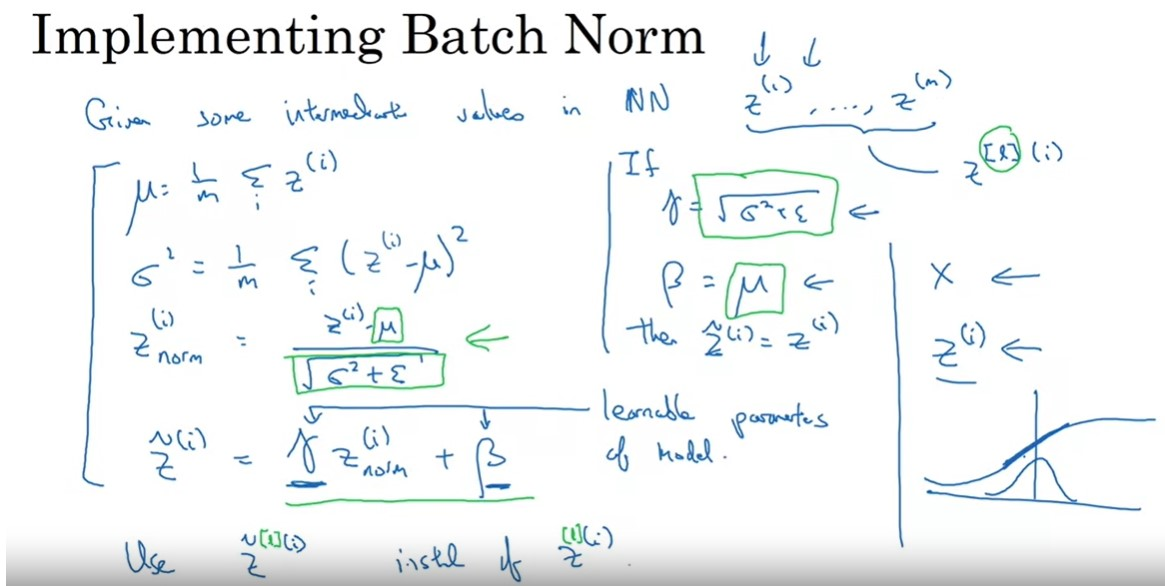 
    
So given these values, what you do is compute the mean as follows. 
    
$Z^{(i)}_{norm} = \frac{Z^{(i)}-\mu}{\sqrt{\sigma^2 + \epsilon}}$


    
First you normalize each value of Z  i.e $Z^{(i)}$ in a layer l using the usual normalization formula by computing mean and variances. So you get $Z^{(i)}$ normalized by subtracting off the mean and dividing by the standard deviation. For numerical stability, we usually add $\epsilon$ to the denominator just in case $\sigma^2$ turns out to be zero in some estimate. 
     
     And so now normalized values of Z have mean 0 and standard unit variance. So every component of Z has mean 0 and variance 1. 
     
     But we don't want the hidden units to always have mean 0 and variance 1. Maybe it makes sense for hidden units to have a different distribution, so what we'll do instead is compute, ztilde which is:
     
$\tilde Z^{(i)} = \gamma Z^{(i)}_{norm} + \beta$

Here, $\gamma$ and $\beta$ are learnable parameters of your model i.e we learn these parameters just like how we learn w and b's.

So we're using gradient descent, or some other algorithm, like the gradient descent of momentum, or rms prop, adam, you would update the parameters $\gamma$ and $\beta$, just as you would update the weights of your neural network. 

Now, notice that the effect of $\gamma$ and $\beta$ is that it allows you to set the mean of $\tilde Z$ to be whatever you want it to be.

In fact, if gamma equals ${\sqrt{\sigma^2 + \epsilon}}$ and beta equals $\mu$, meaning if gamma were equal to this denominator term of $Z^{(i)}_{norm}$ and if $\beta$ were equal to $\mu$, then the effect of $\gamma Z^{(i)}_{norm} + \beta$ is that it would exactly invert this equation. 

So if this is true, then actually $\tilde Z^{(i)}$ is equal to $Z^{(i)}$. 

And so by an appropriate setting of the parameters $\gamma$ and $\beta$, this normalization step, that is, these four equations

$\mu = \frac{1}{m} \Sigma_i Z^{(i)}$

$ \sigma^2 = \frac{1}{m} \Sigma_i (Z^{(i)}-\mu)^2$

$Z^{(i)}_{norm} = \frac{Z^{(i)}-\mu}{\sqrt{\sigma^2 + \epsilon}}$

$\tilde Z^{(i)} = \gamma Z^{(i)}_{norm} + \beta$


is just computing essentially the identity function. 


But by choosing other values of $\gamma$ and $\beta$, this allows you to make the hidden unit values have other means and variances as well. 

And so the way you fit this into your neural network is, whereas previously you were using these values z1, z2, and so on, you would now use $\tilde Z^{(i)}$ instead of $Z^{(i)}$ for the later computations in your neural network. And you want to put back this subscript  [l] to explicitly denote which layer it is in. 

So the intuition I hope you'll take away from this is that we saw how normalizing the input features x can help learning in a neural network. And what batch norm does is it applies that normalization process not just to the input layer, but to the values even deep in some hidden layer in the neural network. So it will apply this type of normalization to normalize the mean and variance of some of your hidden units' values, z. 

But one difference between the training input and these hidden unit values is you might not want your hidden unit values be forced to have mean 0 and variance 1. For example, if you have a sigmoid activation function, you don't want your values to always be clustered at the smaller region between 0 and 1 as the sigmoid tends to have linear regime there. You might want them to have a larger variance or have a mean that's different than 0, in order to better take advantage of the nonlinearity of the sigmoid function rather than have all your values be in just this linear regime. 

So that's why with the parameters $\gamma$ and $\beta$, you can now make sure that your $Z^{(i)}$ values have the range of values that you want. 

But what it does really is, it then shows that your hidden units have standardized mean and variance, where the mean and variance are controlled by two explicit parameters $\gamma$ and $\beta$ which the learning algorithm can set to whatever it wants. So what it really does is it normalizes in mean and variance of these hidden unit values, really the $Z^{(i)}$'s, to have some fixed mean and variance. And that mean and variance could be 0 and 1, or it could be some other value, and it's controlled by these parameters $\gamma$ and $\beta$. 

    So I hope that gives you a sense of the mechanics of how to implement batch norm, at least for a single layer in the neural network. 
    
    We will usually fit batch norm to multilple layers of a deep neural network.
    
    
    And after that, we'll get some more intuition about why batch norm could help you train your neural network.
    
    

### Batch Normalization for Multiple layers of a Deep L Network

    So you have seen the equations for how to implement Batch Norm for maybe a single hidden layer. Let's see how it fits into the training of a deep network. 
    
    So, let's say you have a neural network like this, you've seen me say before that you can view each of the unit as computing two things. First, it computes Z and then it applies the activation function to compute A. And so we can think of each of these circles as representing a two-step computation. And similarly for the next layer, that is Z2 1, and A2 1, and so on. 
    
    
So, if you were not applying Batch Norm, you would have an input X fit into the first hidden layer, and then first compute $Z^[1]$, and this is governed by the parameters $W^[1]$ and $B^[1]$. And then, you would fit $Z^[1]$ into the activation function to compute $A^[1]$. But what would do in Batch Norm is take this value $Z^[1]$, and apply Batch Norm, (sometimes abbreviated BN) to it, and that's going to be governed by parameters, $\beta^{[1]}$ and $\gamma^{[1]}$, and this will give you this new normalize value $Z^[1]$. And then you feed that to the activation function to get $A^[1]$, which is $G^[1](\tilde Z^{[1]})$. Now, you've done the computation for the first layer, where this Batch Norms that really occurs in between the computation from Z and A. 

Next, you take this value $A^[1]$ and use it to compute $Z^[2]$, and so this is now governed by $W^[2]$ and $B^[2]$. And similar to what you did for the first layer, you would take $Z^[2]$ and apply it through BN. This is governed by Batch Norm parameters specific to the next layer. So $\beta^{[2]}$ and $\gamma^{[2]}$, and now this gives you $\tilde Z^{[2]}$, and you use that to compute $A^[2]$ by applying the activation function, and so on. So once again, the Batch Norms that happens between computing Z and computing A. 

And the intuition is that, instead of using the un-normalized value Z, you can use the normalized value $\tilde Z$,. So the parameters of your network are going to ${W^{[1]}, B^{[1]},.., W^{[L]}, B^{[L]}}$, and we have added to this new network, additional parameters $ \beta^{[1]}, gamma^{[1]}, beta^{[2]}, gamma^{[2]}, ..$ and so on, for each layer in which you are applying Batch Norm.

Note that these $\beta$'s here, have nothing to do with the hyperparameter $\beta$ that we had for momentum over the computing the various exponentially weighted averages. These are two completely different Betas. 

  We also update these new parameters of your algorithm just like how we update other params W and B, 
  
  For eg, if you would use optimization algorithm such as gradient descent for optimization. You would optimize these new params, you might compute 
  
  $d\beta^{[l]}$ for a given layer l, and then update the parameters $ \beta$ as:

  $ \beta^{[l]} =  \beta^{[l]} - \alpha * d\beta^{[l]}$
  
  $d\gamma^{[l]}$ for a given layer l, and then update the parameters $ \gamma$ as:

  $ \gamma^{[l]} =  \gamma^{[l]} - \alpha * d\gamma^{[l]}$

Likewise, you can also use Adam or RMSprop or momentum in order to update the parameters $\beta$ and $\gamma$, not just gradient descent. 

If you are using a Deep Learning Programming Framework like tensorflow, usually you won't have to implement the Batch Norm step or Batch Norm layer yourself. Just one line of code will do all the above steps of batch normalization as we discussed in the previous cell. 

In tensorflow framework, you can implement Batch Normalization with this function.

tf.nn.batch_normalization or tf.keras.layers.BatchNormalization()

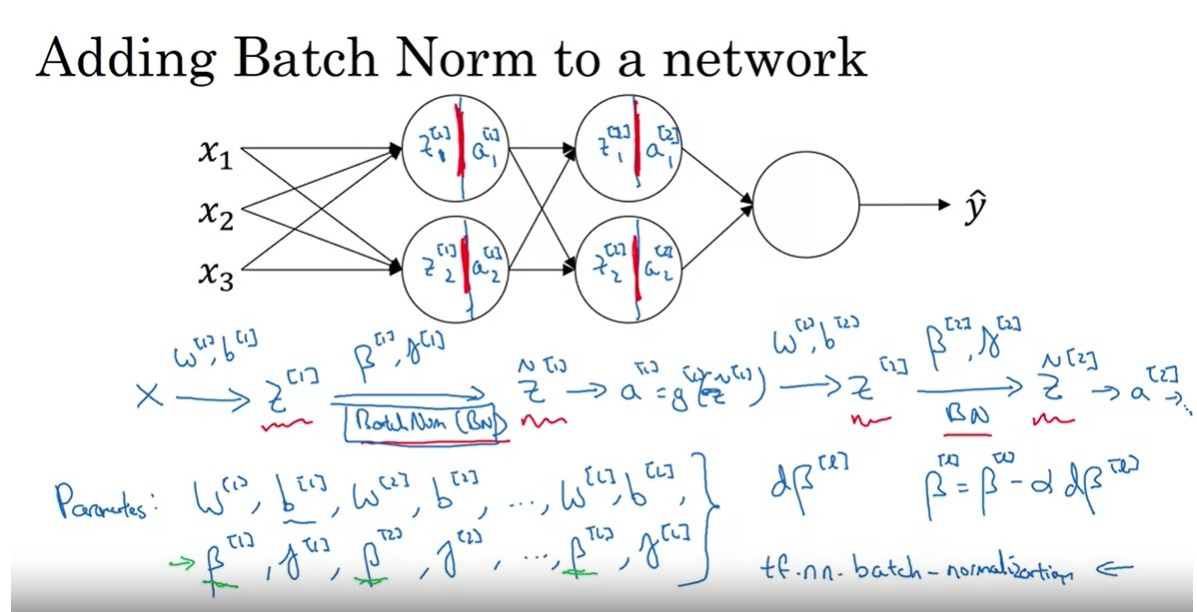

#### BatchNorm for Minibatch Gradient descent

    Now, so far, we've talked about Batch Norm as if you were training on your entire training set at the time as if you are using Batch gradient descent. 
    
In practice, Batch Norm is usually applied with mini-batches of your training set. So the way you actually apply Batch Norm is you take your first mini-batch and compute $Z^{[1]}$ using the parameters $W^{[1]}, B^{[1]}$ and then you take just this mini-batch and computer mean and variance of the $Z^{[1]}$ on just this mini batch and then Batch Norm would subtract by the mean and divide by the standard deviation and then re-scale by $\beta^{[1]}$, $\gamma^{[1]}$, to give you $Z^{[1]}$ and all this is on the first mini-batch, then you apply the activation function to get $A^{[1]}$, and then you compute $ Z^{[2]}$ using $ W^{[2]}, B^{[2]}$ and so on. 

So you do all this, in order to perform one step of gradient descent on the first mini-batch and then goes to the second mini-batch $X^{\{2\}}$, and you do something similar where you will now compute $Z^{[1]}$ on the second mini-batch and then use Batch Norm to compute $\tilde Z^{[1]}$. And so here in this Batch Norm step, You would be normalizing $\tilde Z^{[1]}$ using just the data in your second mini-batch. It looks at the examples in your second mini-batch, computing the mean and variances of the $Z^{[1]}$'s on just that mini-batch and re-scaling by $\beta^{[1]}$ and $\gamma^{[1]}$ to get $\tilde Z^{[1]}$, and so on. And you do this with a third mini-batch, and keep training. 

Now, there's one detail to the parameterization that I want to clean up, which is previously, I said that the parameters was $W^{[l]} and B^{[l]}$, for each layer l, as well as $\beta^{[l]} and \gamma^{[l]}$. Now notice that the way Z was computed is as follows, $Z^{[l]} = W^{[l]} A^{[l-1]} + B^{[l]}$. 

**But usually we can just omit this B bias parameter**

What Batch Norm does is, it is going to look at the mini-batch and normalize $Z^{[l]}$ to first of mean 0 and standard variance, and then a rescale by $\beta^{[l]} and \gamma^{[l]}$. What that means is that, whatever is the value of $B^{[l]}$, its actually going to just get subtracted out, because during that Batch Normalization step, you are going to compute the means of the $Z^{[l]}$'s and subtract the mean. And so adding any constant to all of the examples in the mini-batch, it doesn't change anything. Because any constant you add will get cancelled out by the mean subtractions step. So, if you're using Batch Norm, you can actually eliminate that parameter $B^{[l]}$, or if you want, think of it as setting it permanently to 0. So then the parameterization becomes $Z^{[l]} =  W^{[l]} A^{[l-1]}$, And then you compute $Z^{[l]}_norm$ , and we compute $\tilde Z^{[l]}$ = $\gamma^{[l]} Z^{[l]_norm} + \beta^{[l]}$. You instead end up using this parameter $\beta^{[l]}$ in order to decide whats that mean of $\tilde Z^{[l]}$ which is what gets passed to the activation of that layer. 

So just to recap, because Batch Norm zeroes out the mean of these $Z^{[l]}$ values in the layer l, there's no point having this parameter $B^{[l]}$, and so you must get rid of it, and instead, it is sort of replaced by $\beta^{[l]}$, which is a parameter that controls that ends up affecting the shift or the biased terms.

Finally, remember that the dimension of $Z^{[l]}$, if you're doing this on one example, it's $(n^l, 1)$, and so $B^{[l]}$ is also $(n^l, 1)$, where $n^l$ was the number of hidden units in layer l. 

And so the dimension of $\beta^{[l]} and \gamma^{[l]}$ is also going to be $(n^l, 1)$ because that's the number of hidden units you have. You have $n^l$ hidden units, and so $\beta^{[l]} and \gamma^{[l]}$ are used to scale the mean and variance of each of the hidden units to whatever the network wants to set them to. 
 
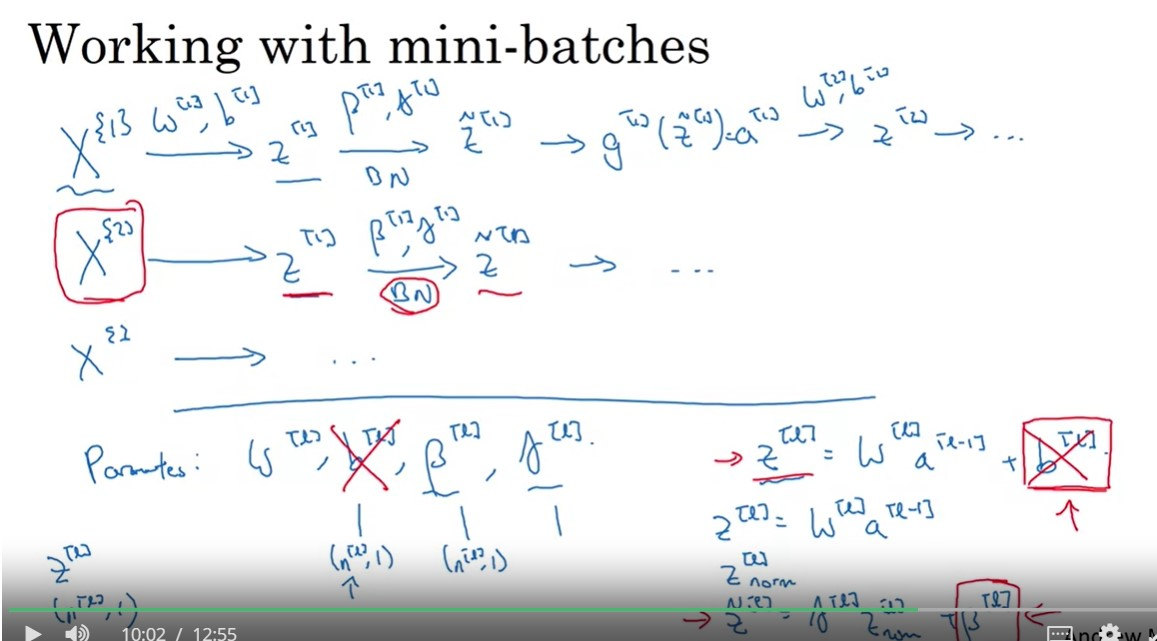

$\alpha$
So, let's pull all together and describe how you can implement gradient descent using Batch Norm. Assuming you're using mini-batch gradient descent,

**Mini Batch gradient descent algorithm with batch norm:**

    for each epoch,
        for T = 1 to the num_mini_batches,
            Implement forward prop on mini-batch $X^{\{t\}}$ 
                Apply batch Norm each hidden layer, to replace $Z^{[l]}$ with $\tilde Z^{[l]}$ 
                so within that mini-batch, the value Z end up with some normalized mean and variance
            Implement backprop and calculate gradients dW, dB, d𝛽, d𝛾 w.r.to cost J for each layer. dB can be ignored even
            Update the parameters for each layer l using
                W := W - 𝛼dW
                𝛽 := 𝛽 - 𝛼d𝛽
                𝛾 := 𝛾 - 𝛼d𝛾
            
            
      Note: This also works with gradient descent with momentum, or RMSprop, or Adam. Where instead of taking this gradient descent update with mini-batch, you could use the updates given by these other algorithms as we discussed in the previous week.
      
      So, I hope that gives you a sense of how you could implement Batch Norm from scratch if you wanted to. If you're using one of the Deep Learning Programming frameworks which we will talk more about later, hopefully you can just call someone else's implementation in the Programming framework which will make using Batch Norm much easier. 
    

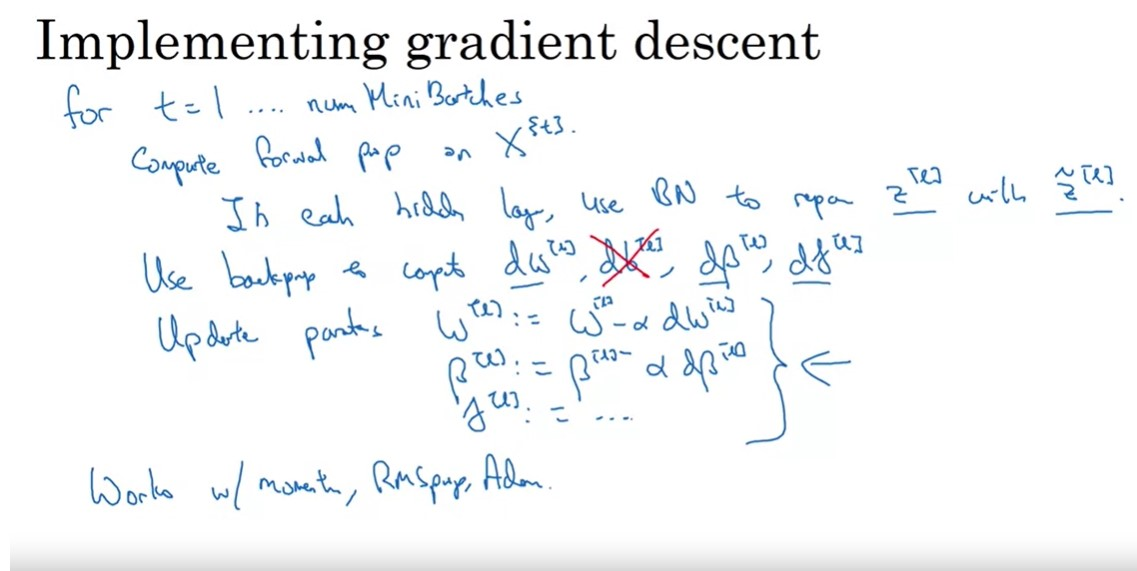

    Now, in case Batch Norm still seems a little bit mysterious if you're still not quite sure why it speeds up training so dramatically, let's go to the next topic and talk more about why Batch Norm really works and what it is really doing.

#### Whats the need for batch normalization?  Covariate Shift

    So, why does batch norm work? 
    
    Here's one reason, you've seen how normalizing the input features, the X's, to mean zero and variance one, how that can speed up learning. So rather than having some features that range from 0 to 1, and some from 1 to 1,000, by normalizing all the features, input features X, to take on a similar range of values that can speed up learning. 
    
    So, one intuition behind why batch norm works is, this is doing a similar thing, but further values in your hidden units and not just for your input there. Now, this is just a partial picture for what batch norm is doing. There are a couple of further intuitions, that will help you gain a deeper understanding of what batch norm is doing. 
    
    Let's take a look at those.
    
    A second reason why batch norm works, is it makes weights, later or deeper than your network, say the weight on layer 10, "more robust to changes to weights in earlier layers of the neural network", say, in layer one. 
    
    To explain what I mean, let's look at this most vivid example. Let's use a network, maybe a shallow network, like logistic regression or maybe a neural network, on our famous cat detection task. 
    
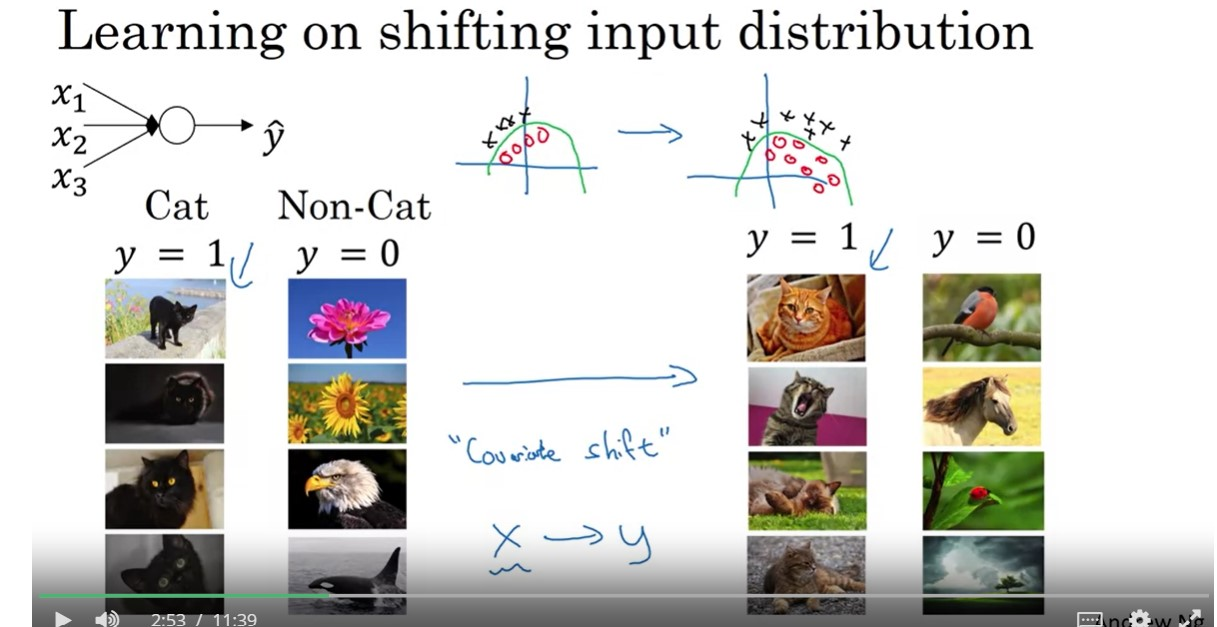

    But let's say that you've trained your data sets on all images of black cats. If you now try to apply this network to data with colored cats where the positive examples are not just black cats like on the left, but color cats like on the right, then your learned model might not do very well. 
    
    For eg, if your training set looks like the plots on center left scatter plot, where you have positive training examples y=1 and negative training examples y=0 , but you were to try to generalize it to a data set of the right scatter plot where maybe positive examples y=1 and the negative examples y=0 have different distribution.
    
    You might not expect a model trained on the data on the left to do very well on the data on the right. Even though they might be the same function(identifying y=0 or 1) that actually works well, but you wouldn't expect your learning algorithm to discover that green decision boundary, just looking at the data on the left. 
    
    So, this idea of your data distribution changing goes by the somewhat fancy name, "covariate shift". 
    
    And the idea is that, if you've learned some X to Y mapping, if the distribution of X changes, then you might need to retrain your learning algorithm. And this is true even if the function, the ground truth function, mapping from X to Y, remains unchanged, which it is in this example,  the ground true function is, is this picture a cat or not. 
    
    And the need to retain your function becomes even more acute or it becomes even worse if the ground truth function shifts as well. 
    
    So, how does this problem of covariate shift apply to a neural network? 
    
        Consider a deep network like below, and let's look at the learning process from the perspective of this certain layer, the third hidden layer. So this network has learned the parameters W3 and B3. And from the perspective of the third hidden layer, it gets some set of values from the earlier layers, and then it has to do some stuff to hopefully make the output Y-hat close to the ground true value Y.

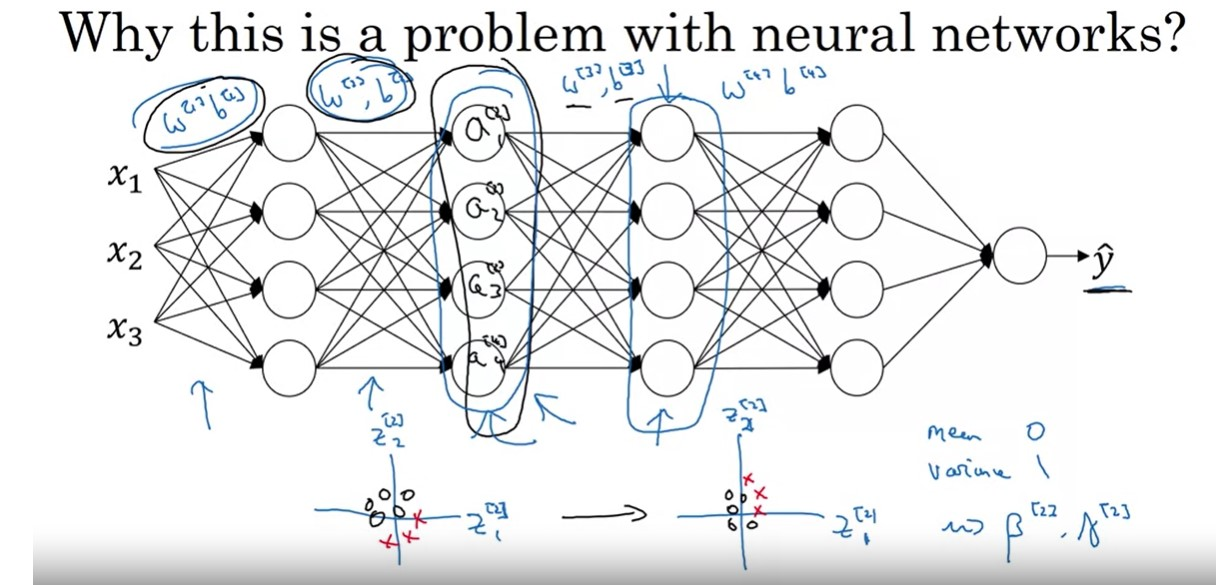

    So from the perspective of this third hidden layer, it gets some values, let's call them A_2_1, A_2_2, A_2_3, and A_2_4. But these values are nothing but features like X1, X2, X3, X4, and the job of the third hidden layer is to take these values and find a way to map them to Y-hat.
    
    So you can imagine that these parameters W_3, B_3 as well as maybe W_4, B_4, and even W_5, B_5, maybe try and learn those parameters, so the network does a good job, mapping from the values I drew in black on the left to the output values Y-hat.
    
    But the network is also adapting parameters W_2, B_2 and W_1, B_1, and so as these parameters change, these values, A_2, will also change. So from the perspective of the third hidden layer, these hidden unit values are changing all the time, and so it's suffering from the problem of covariate shift that we talked before. 
    
    So what batch norm does, is it reduces the amount that the distribution of these hidden unit values shifts around. And if it were to plot the distribution of these hidden unit values, maybe this is technically renormalizer Z, so this is actually Z_2_1 and Z_2_2, and I also plot two values instead of four values, so we can visualize in 2D. 
    
    What batch norm is saying is that, the values for Z[2]_1 and Z[2]_2 can change, and indeed they will change when the neural network updates the parameters in the earlier layers. But what batch norm ensures is that no matter how it changes, the mean and variance of Z[2]_1 and Z[2]_2 will remain the same. 
    
    So even if the exact values of Z[2]_1 and Z[2]_2 change, their mean and variance will at least stay same mean zero and variance one. Or, not necessarily mean zero and variance one, but whatever value is governed by 𝛽[2] and 𝛾[2]. 
    
    What this does is, it limits the amount to which updating the parameters in the earlier layers can affect the distribution of values that the third layer now sees and therefore has to learn on. And so, batch norm reduces the problem of the input values changing, it really causes these values to become more stable, so that the later layers of the neural network has more firm ground to stand on. 
    
    And even though the input distribution changes a bit, it changes less, and what this does is, even as the earlier layers keep learning, the amounts that this forces the later layers to adapt to as early as layer changes is reduced or, if you will, it "weakens the coupling" between what the early layers parameters has to do and what the later layers parameters have to do.
    
    So it allows each layer of the network to learn by itself, a little bit more independently of other layers, and this has the effect of speeding up of learning in the whole network. 
    
    So I hope this gives some better intuition, but the takeaway is that batch norm means that, especially from the perspective of one of the later layers of the neural network, the earlier layers don't get to shift around as much, because they're constrained to have the same mean and variance. And so this makes the job of learning on the later layers easier.

### Batch Norm as a regularizer
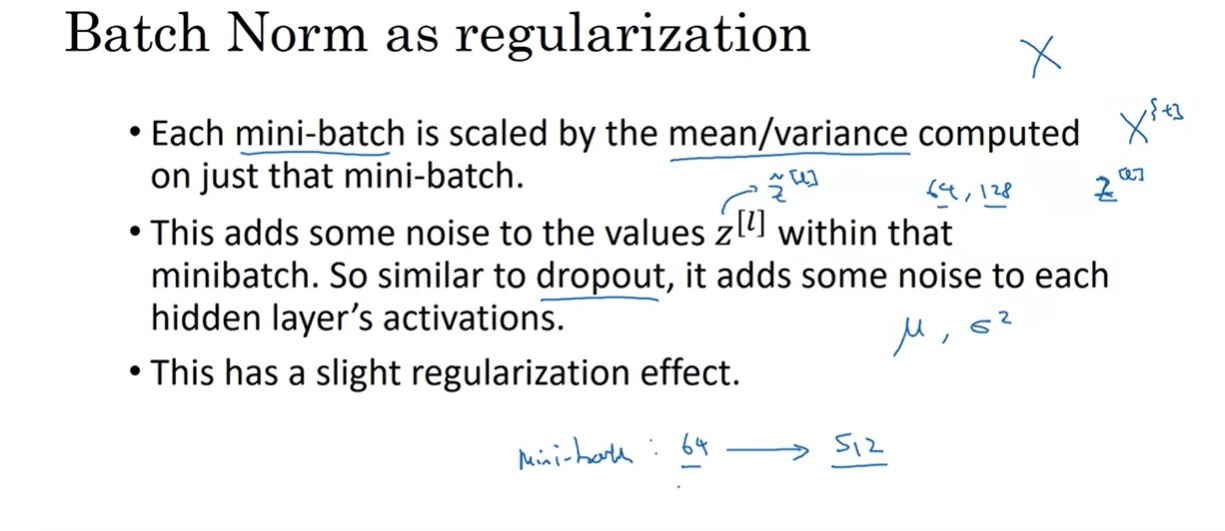

    It turns out batch norm has a second effect, it has a slight regularization effect.
    
    So one non-intuitive thing of a batch norm is that each mini-batch, X_t, has the values Z_t, has the values Z_l, scaled by the mean and variance computed on just that one mini-batch. 
    
    Now, because the mean and variance computed on just that mini-batch as opposed to computed on the entire data set, that mean and variance has a little bit of noise in it, because it's computed just on your mini-batch of, say, 64, or 128, or maybe 256 or larger training examples. So because the mean and variance is a little bit noisy because it's estimated with just a relatively small sample of data, the scaling process, going from Z_l to Z_2_l, that process is a little bit noisy as well, because it's computed, using a slightly noisy mean and variance. 
    
    So similar to dropout, it adds some noise to each hidden layer's activations. The way dropout adds noises, it takes a hidden unit and it multiplies it by zero with some probability and multiplies it by one with some probability. And so your dropout has multiplicative noise because it's multiplied by zero or one, whereas batch norm has multiplicative noise because of scaling by the standard deviation, as well as additive noise because it's subtracting the mean. 
    
    Well, here the estimates of the mean and the standard deviation are noisy. And so, similar to dropout, batch norm therefore has a slight regularization effect. Because by adding noise to the hidden units, it's forcing the downstream hidden units not to rely too much on any one hidden unit. And so similar to dropout, it adds noise to the hidden layers and therefore has a very slight regularization effect. 
    
    But the noise added is quite small, this is not a huge regularization effect, and you might choose to use batch norm together with dropout, and you might use batch norm together with dropouts if you want the more powerful regularization effect of dropout. 
    
    And maybe one other slightly non-intuitive effect is that, if you use a bigger mini-batch size, say, 512 instead of 64, you're reducing this noise and therefore also reducing this regularization effect. So that's one strange property of dropout which is that by using a bigger mini-batch size, you reduce the regularization effect. 
    
    Having said this, I wouldn't really use batch norm as a regularizer, that's really not the intent of batch norm, but sometimes it has this extra intended or unintended effect on your learning algorithm. But, really, don't turn to batch norm as a regularization. Use it as a way to normalize your hidden units activations and therefore speed up learning and the regularization is an almost unintended side effect.
    
    So I hope that gives you better intuition about what batch norm is doing. Before we wrap up the discussion on batch norm, there's one more detail I want to make sure you know, which is that batch norm handles data one mini-batch at a time. It computes mean and variances on mini-batches. So at test time, you try and make predictors, try and evaluate the neural network, you might not have a mini-batch of examples, you might be processing one single example at the time. So, at test time you need to do something slightly differently to make sure your predictions make sense. 
    
    Let's talk over the details of what you need to do in order to take your neural network trained using batch norm to make predictions.

### Batch Norm at test time

    We need to normalize the hidden layers even at test time. Because we are normalizing at training time, this means the model trained on normalized on values. If we dont batch normalize at test time, then the model which is trained on different scale during training time will not work well at test time.
    
    Batch norm processes your data one mini batch at a time, but the test time you might need to process the examples one at a time. 
    
    Let's see how you can adapt your network to do that. 
    
    Recall that during training, here are the equations you'd use to implement batch norm. Within a single mini batch, you'd sum over that mini batch of the ZI values to compute the mean. So here, you're just summing over the examples in one mini batch. I'm using M to denote the number of examples in the mini batch not in the whole training set. Then, you compute the variance and then you compute Z norm by scaling by the mean and standard deviation with Epsilon added for numerical stability. And then Z̃ is taking Z norm and rescaling by gamma and beta. So, notice that mu and sigma squared which you need for this scaling calculation are computed on the entire mini batch. 
    
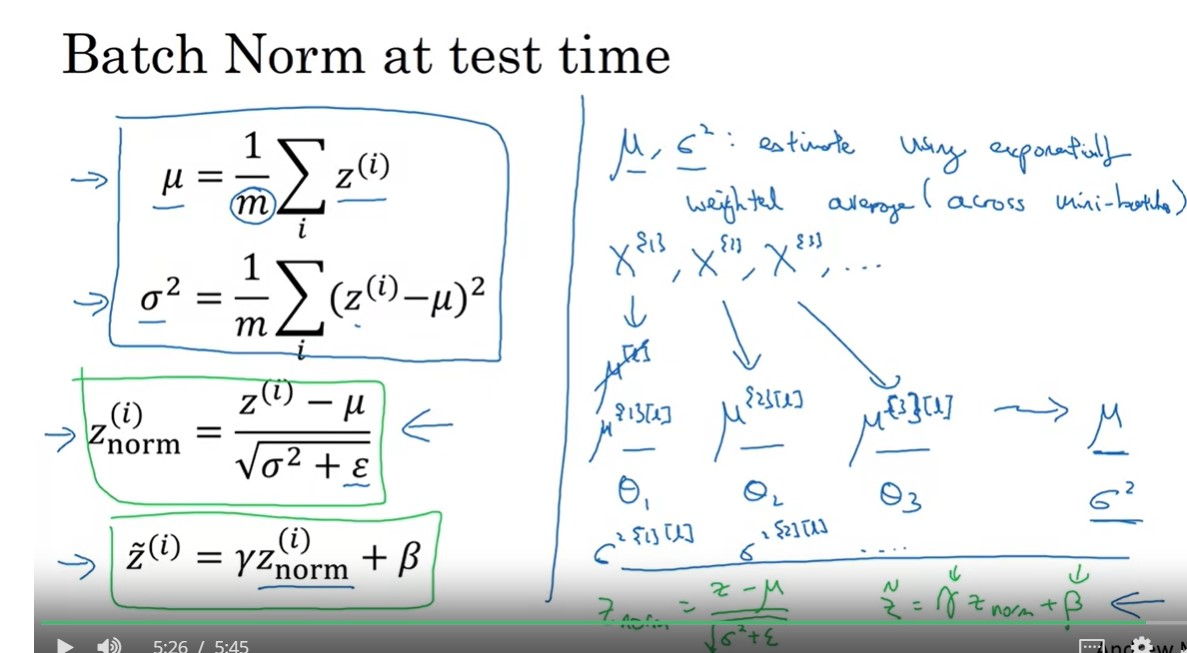

But the test time you might not have a mini batch of 64 or 2056 examples to process at the same time. So, you need some different way of coming up with $\mu$ and $\sigma^2$. 

And if you have just one example, taking the mean and variance of that one example, doesn't make sense. 

So what's actually done in order to apply your neural network with BN at test time is, to come up with some separate estimate of $\mu$ and $\sigma^2$. And in typical implementations of batch norm, what you do is "estimate this using a exponentially weighted average" where the average is across the mini batches. 

Let's pick some layer l and let's say you're going through mini batches $X^{\{1\}}, X^{\{2\}}$ together with the corresponding values of Y and so on. So, when training on $X^{\{1\}}$ for that layer l, you get some $\mu^{[l]}$. And in fact, this is mu for the first mini batch of that layer l, $\mu^{[l]{\{1\}}}$. 

And then when you train on the second mini batch for that layer l and that mini batch $X^{\{2\}}$, you end up with some second value of mu $\mu^{[l]{\{2\}}}$. And then for the fourth mini batch in this hidden layer, you end up with some value for mu $\mu^{[l]{\{4\}}}$. 

So just as we saw how to use a exponentially weighted average to compute the mean of $\theta 1$, $\theta 2$, $\theta 3$, when you were trying to compute a exponentially weighted average of the current temperature, you would do that to keep track of what's the latest average value of this mean vector you've seen. So that exponentially weighted average becomes your estimate for what the mean of the Z's is for that hidden layer and similarly, you use an exponentially weighted average to keep track of these values of $\sigma^2$ that you see on the first mini batch in that layer, $\sigma^2$ that you see on second mini batch and so on. So you keep a running average of the $\mu$ and the $\sigma^2$ that you're seeing for each layer as you train the neural network across different mini batches. 

Then finally at test time, what you do is, you would just compute Z_norm using whatever value your Z have, and using your exponentially weighted average of the $\mu$ and $\sigma^2$ whatever was the latest value you have to do the scaling here.

And then you would compute Z̃ on your one test example using that Z_norm that we just computed on the left and using the beta and gamma parameters that you have learned during your neural network training process. 

So the takeaway from this is that during training time $\mu$ and $\sigma^2$ are computed on an entire mini batch of say 64 engine, 28 or some number of examples. But that test time, you might need to process a single example at a time. So, the way to do that is to estimate $\mu$ and $\sigma^2$ from your training set and there are many ways to do that. 

You could in theory run your whole training set through your final network to get $\mu$ and $\sigma^2$. But in practice, what people usually do is implement and exponentially weighted average where you just keep track of the $\mu$ and $\sigma^2$ values you're seeing during training and use an exponentially weighted average, also sometimes called the "running average", to just get a rough estimate of $\mu$ and $\sigma^2$ ,and then you use those values of $\mu$ and $\sigma^2$ at test time to do the scaling of hidden units of Z. 

In practice, this process is pretty robust to the exact way you used to estimate $\mu$ and the $\sigma^2$. So, I wouldn't worry too much about exactly how you do this and if you're using a deep learning framework, they'll usually have some default way to estimate the $\mu$ and $\sigma^2$ that should work reasonably well. But in practice, any reasonable way to estimate the mean and variance of your hidden unit values Z should work fine at test. 

So, that's it for batch norm and using it, you'll be able to train much deeper networks and get your learning algorithm to run much more quickly. 

### Multiclass classification(Softmax Regression)
     So far, the classification examples we've talked about have used binary classification, where you had two possible labels, 0 or 1. Is it a cat, is it not a cat? What if we have multiple possible classes? (cat, dog, babychick, others..)
    
    There's a generalization of logistic regression called Softmax regression.  
    
    As we are using logistic regression for binary classification, we will generalize this to multiclass classification called softmax regression. 
    
    Here you make predictions where you're trying to recognize one of C or one of multiple classes, rather than just recognize two classes for a given example.
    
    Let's say that instead of just recognizing cats you want to recognize cats, dogs, baby chicks. So I'm going to call cats class 1, dogs class 2, baby chicks class 3 and if none of the above, then there's an other or a none of the above class, which I'm going to call class 0. 
    
    So here's an example of the images and the classes they belong to. That's a picture of a baby chick, so the class is 3. Cats is class 1, dog is class 2, I guess that's a koala, so that's none of the above, so that is class 0, class 3 and so on. 
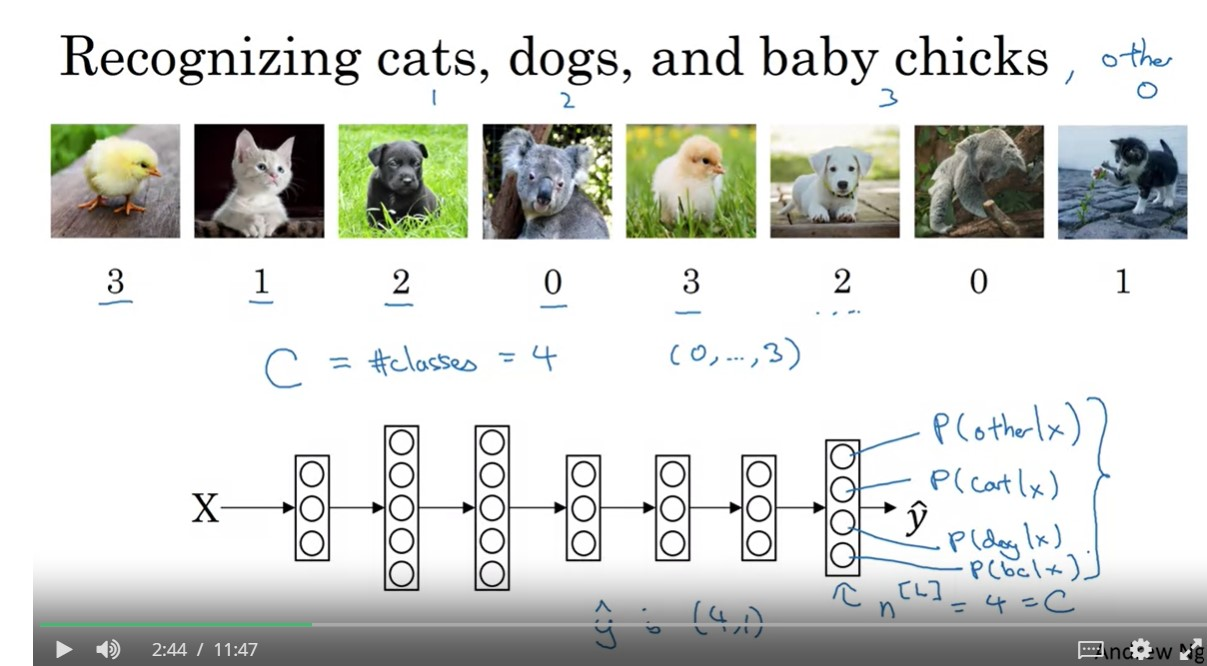  

    So the notation we're going to use is, C to denote the number of classes you're trying to categorize your inputs into. And in this case, you have four possible classes, including the other or the none of the above class. So when you have four classes, the numbers indexing your classes would be {0,..,C-1}. So in other words, that would be 0, 1, 2, 3.
    
    Softmax regression is generalized version of logistic regression.
    
    For logistic regression, we will use sigmoid function as g(.) that is passed on to z inorder to get the probability of whether an example belongs to class 0 or class 1 (cat, Dog) (Cat, Not Cat). Sigmoid returns the probability between 0 to 1, and the probability represents that whether an example belongs to class 1. (P(Y=1) probability of belonging to class 1). If the return probability is greater than the threshold, then it belongs to class 1 else it belongs to class 0. The cost function we use is BinaryCrossEntropy. FOr Logistic regression we will have only one output unit.
    
    For multiclass classification, we have multiple classes like C1, C2, C3,..,.(Cat, dog, babychick, Pig,..)(0, 1, 2, 3) and we use softmax regression to classify whether an example belongs to any one of these multiple classes. So, instead of one outout unit, softmax regression will have as many output units as number of classes and each unit will have the probability of that examples belonging to that class.
    
    In Softmax regression, we will use softmax function as g(.) that is passed on to z, and the softmax function returns the probabilities of all the existing classes(P(Y=0), P(Y=1), P(Y=2)) instead of just one class when using sigmoid. It uses the below formula to get the softmax probabilities.
    
$g(Z_1) = softmax(Z_1) = \frac {e^{Z_1}}{\Sigma_{i=1}^{num_classes} e^{Z_i}}$

$g(Z_2) = softmax(Z_2) = \frac {e^{Z_2}}{\Sigma_{i=1}^{num_classes} e^{Z_i}}$

$g(Z_3) = softmax(Z_3) = \frac {e^{Z_3}}{\Sigma_{i=1}^{num_classes} e^{Z_i}}$

$g(Z_4) = softmax(Z_4) = \frac {e^{Z_4}}{\Sigma_{i=1}^{num_classes} e^{Z_i}}$

    
    These probabilities represent the probability of an example belong to each class(0, 1, 2, 3). The example will be classified as a class, that has maximum probability.
    
    So, till now we are dicussion about how logistic or softmax regression works in classifying an input. These can be basically seen as a single or shallow network.
    
    But what if we use a deep neural network for binary classification or multiclass classification. We use sigmoid or softmax function as activation function respectively in the output layer.
       
    In our example, we're going to build a neural network, where the final layer has four, or in this case the variable capital alphabet C units in the output layer. So N, the number of units outer layer which is layer L is going to equal to 4 or in general this is going to equal to C.
    
First unit in the o/p layer tells the probability that given input example x is the other class, second unit will output probability that it is a cat, 3rd unit will output probability as a dog and 4th unit will output the probability that it is a baby chick. So here, the output labels $\hat y$ is going to be a 4x1 dimensional vector for a single example, because it now has to output four numbers, giving you these four probabilities. And because probabilities should sum to one, the four numbers in the output $\hat y$, they should sum to one.
    
The standard model for getting your network to do this uses what's called a Softmax layer to the output layer in order to generate these outputs. 

So in the final layer of the neural network, you are going to compute as usual the linear part of the layer i.e $Z^{[L]} = W^{[L]} A^{[L-1]} + B^{[L]}$. Now having computed $Z^{[L]}$, you now need to apply what's called the Softmax activation function. You basically calculates e^Z for all the units in the output layers and uses the below formular for each unit to get its softmax probabilities    
    
$a^{[L]}= g(Z^{[L]}) = softmax(Z^{[L]}) = \frac {e^{Z^{[L]}}}{\Sigma_{i=1}^{num_classes} e^{Z^{[L]}_i}}$
    
    The unusual thing about this particular activation function is that, this activation function g, it takes a input a 4x1 vector and it outputs a 4x1 vector. 

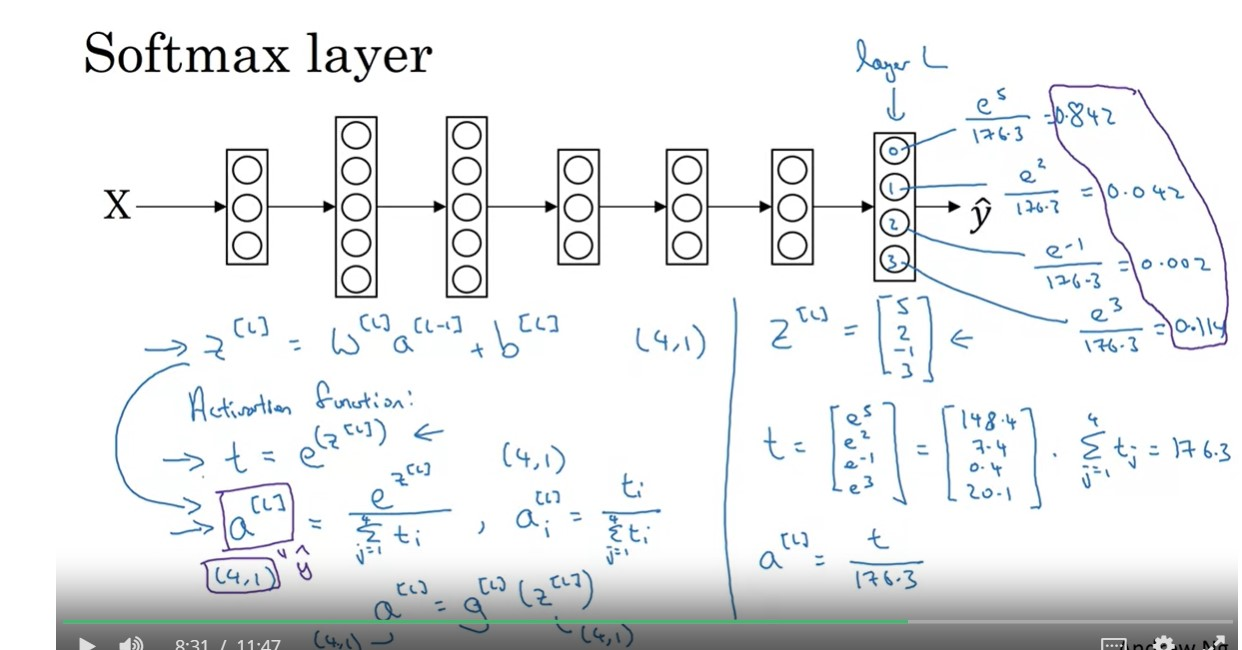

 One we get the probabilities from the output layer of all the classes for every example, we use a loss function to find out the loss and subsequently the average cost. The loss can be either "CategoricalCrossEntropy" or "SparseCategoricalCrossEntropy". We decide which one to use based on the representation of our true target $Y^{(i)}$. 
    
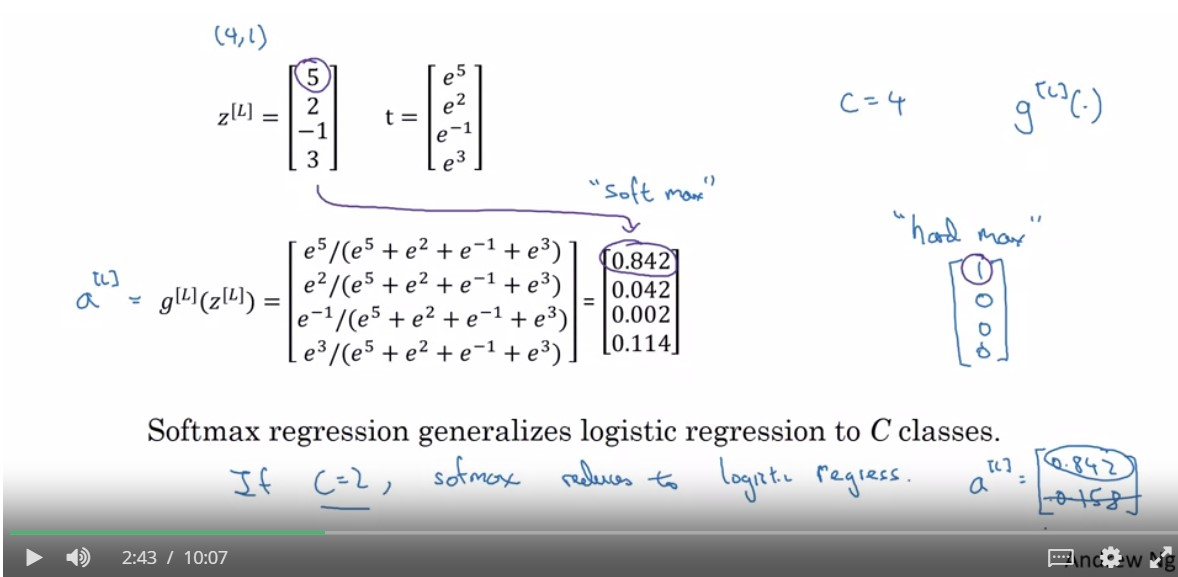

    So you notice that in the Z vector, the biggest element was 5, and the biggest probability ends up being this first probability. 
    
    Note: The name softmax comes from contrasting it to what's called a hard max which would have taken the vector Z and matched it to this vector on the right. So hard max function will look at the elements of Z and just put a 1 in the position of the biggest element of Z and then 0's everywhere else. And so this is a very hard max where the biggest element gets a output of 1 and everything else gets an output of 0. Whereas in contrast, a softmax is a more gentle mapping from Z to these probabilities. So, I'm not sure if this is a great name but at least, that was the intuition behind why we call it a softmax, all this in contrast to the hard max.

    Now let's look at how you would actually train a neural network with a softmax output layer. So in particular, let's define the loss functions you use to train your neural network. Let's take an example in your training set where the target output, the ground truth label is [0 1 0 0]. This means that this is an image of a cat because it falls into Class 1. 
     
     And now let's say that your neural network is currently outputting $\hat y$ = (0.3, 0.2, 0.1, 0.4) ,sum of probabilities is equal to 1 and this is going to be a[L]. So the neural network's not doing very well in this example because this is actually a cat and assigned only a 20% chance that this is a cat. So didn't do very well in this example.

    In softmax classification, the loss function for a single example would be,
    
$Loss =  - \Sigma_{j=1}^4 y_{j} log \hat y_{j}$

and in general, loss for single example would be,

$Loss(\hat y^{(i)}, y^{(i)}) = - \Sigma_{j=1}^C y_{j} log \hat y_{j}$
    
So let's look at our single example above to better understand what happens.
    
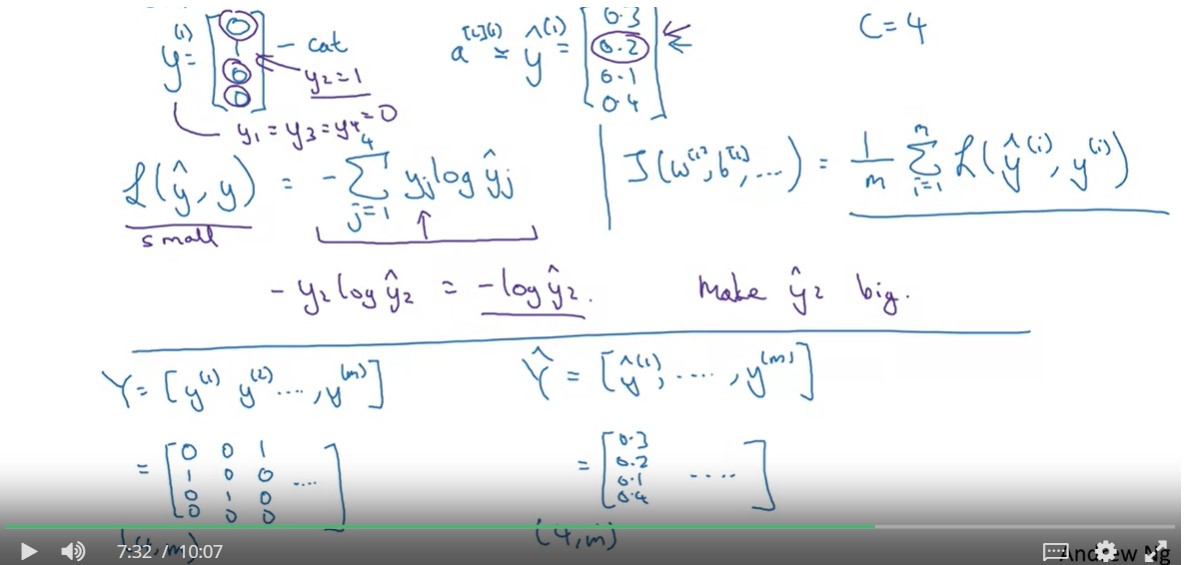

Notice that in this example, the true values $y_1 = y_3 = y_4 = 0$ because those are 0s and only $y_2 = 1$. So if you look at this summation, all of the terms with 0 values of $y_{j}$ were equal to 0. And the only term you're left with is $-y_2 log \hat y_{2}$, because we use sum over the indices of j, all the terms will end up 0, except when j=2. And because $y_2 = 1$, this is just $-log \hat y_{2}$.

$Loss(\hat y^{(i)}, y^{(i)}) = - log \hat y_{j}$ 

where j belongs to its true class

So what this means is that, if your learning algorithm is trying to make this loss small, because you use gradient descent to try to reduce the loss on your training set, then the only way to make this loss small is to make this $-log \hat y_{2}$ small. And the only way to do that is to make $\hat y_{2}$ as big as possible.

Also note, these predicted outputs are probabilities, so they can never be bigger than 1. 

But this kind of makes sense because X for this example is the picture of a cat, then you want that output probability to be as big as possible. So more generally, what this loss function does is, it looks at whatever is the ground truth class in your training set, and it tries to make the corresponding probability of that class as high as possible.

If you're familiar with maximum likelihood estimation statistics, this turns out to be a form of maximum likelyhood estimation. It is maximising the likelihood of y being cat.

This is the loss on a single training example. 

How about the cost J on the entire training set. 

Its nothin but average of all the losses.

$Cost = \frac{1}{m} \Sigma_{i=1}^m Loss(\hat y^{(i)}, y^{(i)}) $

This cost function is also called Categorical Cross Entropy or Sparse categorical cross entropy. Both uses the same cost function internally. But which cost function to choose depends on the true target value $Y^{(i)}$. 

If $Y^{(i)}$ contains single integer values as the classes(label encoding)(0, 1, 2, 3), then use Sparse categorical cross entropy cuz it expects the integer as a input(Y^{(i)}) and this integer nothing but the true class of the example. 

So to say, for entire training set, Y will have shape (1, m) for deep neural networks or (m, 1) usually otherwise. 
    
If $Y^{(i)}$ contains one hot encoding as the classes 

    => one hot encoding for cat (1, 0, 0, 0) for dog (0, 1, 0, 0) and so on
        If ex1 belongs to cat so it will have its y as [1 0 0 0]
        If ex2 belongs to dog  so it will have its y as [0 1 0 0] ...

then use categorical cross entropy cuz it expects the vector as a input.

Remember, the predicted class $\hat y$ when using softmax will be of shape(num_classes, m) anytime. That means a column vector for each input example's predicted probabilities. Each column contains probabilities of each example belonging to all the classes. In those probabilities, one will have maximum probability representing the model predicted that index as class to this input example. So the softmax returns the output $\hat y$ to be of shape (4, batchsize) for our example and  4 classes probabilities for each example stacked up horizontally.

The only difference is the shape of $Y$. Its really a column vector for each m, and each column is a one hot encoding vector in which the true class value is hot(1) and the remaining is zero. If thats the case where shape of $Y$ is (C, m), use categorical cross entropy. If it has one column vector for all the m's (1, m), then use sparsecategorical cross entropy.

During inference(prediction), we can use, np.argmax(a) to get the class of any example that has maximum probability.

    In summary, If your Yi's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]. But if your Yi's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1], [2], [3]. The usage entirely depends on how you load your dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

Note: Sparse categorical cross entropy internally uses categorical cross entropy method of changing the class values to one hot encoding and uses the same cost function as described above. 

Finally, let's take a look at how you'd implement gradient descent when you have a softmax output layer. So this output layer will compute $Z^{[L]}$ which is Cx1 in our example, 4x1 and then you apply the softmax activation function to get $A^{[L]}$, or $\hat y$.

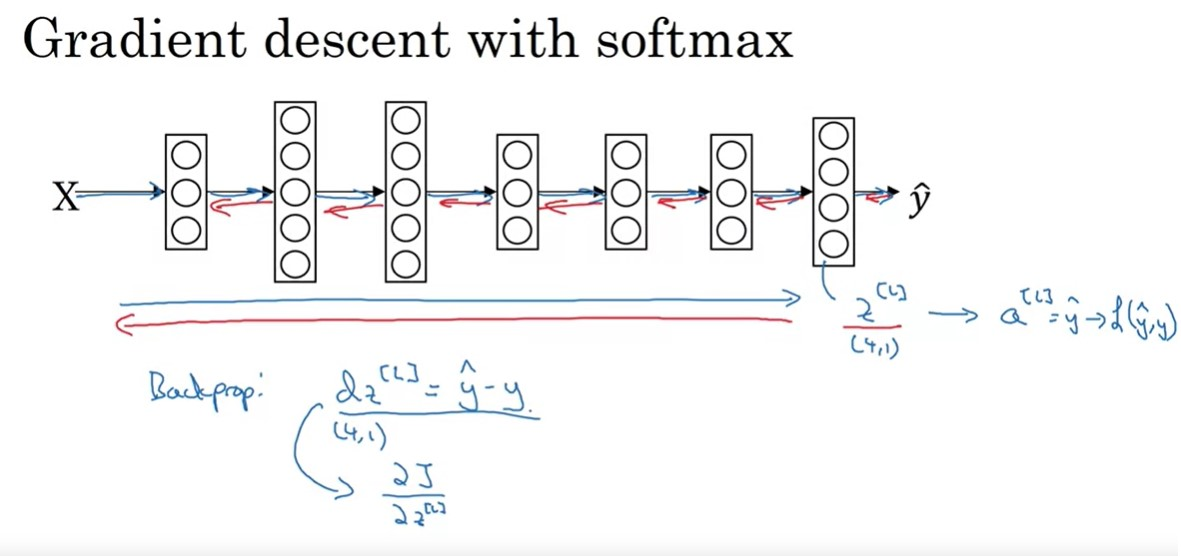

    Before we wrap up for this week, I want to share with you some thoughts on deep learning frameworks as well. Let's start to talk about that in the next video.
    
### Tensorflow Gradient Tape for Autodifferentitation

    There are few deep learning program frameworks that can help you be much more efficient in how you develop and use deep learning algorithms. One of these frameworks is TensorFlow.

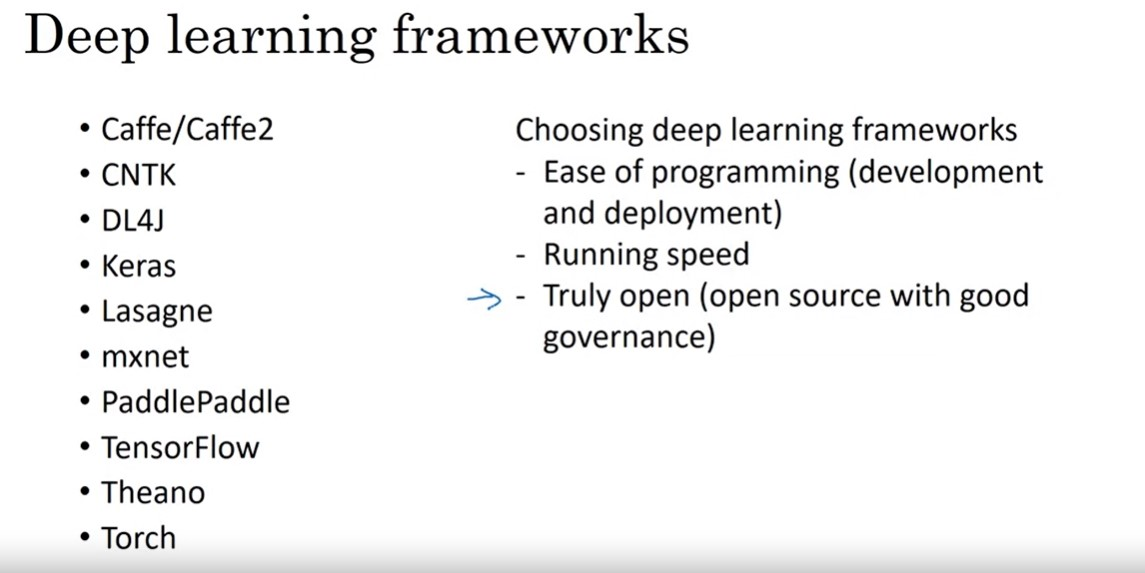

    Tensorflow is a powerful library. It simpliefies our code. Its key advantage is, we just have to give the forward prop in a tf functional api called GradientTape(). The tape just like our cassette tape, it records all the operations in the forward prop using graph technology by creating a computational graph. No need to specify the backpropagation steps. It just go reverse in the tape to perform the backprop calculations by itself to calculate gradients. This awesome functionality is also called Auto differentiation or Auto diff.
    
    Note: We can also achieve this using another tensorflow functional api called @tf.function when we want to use the usual python functions to do autodiff. But these tf.function() has some difficulties. See more in tf documentation. 
https://stackoverflow.com/questions/69133906/taking-gradients-when-using-tf-function
    
    When using tf framework to perform autodiff, we have to specify the traininable parameters W and b as Tensorflow varaibles. These variables will be watched by the tape automatically. The inputs like X and Y can be represented using numpy arrays.

    As a motivating problem, let's say that you have some cost function J that you want to minimize. For this example, I'm going to use this highly simple cost function, 
      
$J(W) =  W^2 - 10W + 25$
      
You might notice that this function is actually $(W - 5)^2$. If you expand out this quadratic, you get the expression above. The value of w that minimizes this, is W=5. 

But let's say we didn't know that, and you just have this function. Let us see how you can implement something in TensorFlow to minimize this. Because a very similar structure, a program can be used to train neural networks where you can have some complicated cost function J(W, b) depending on all the parameters of your neural network. 

Then similarly, you build a use TensorFlow to automatically try to find values of W and b that minimize this cost function, but let's start with the simpler example.

First thing you want to do is define the parameter W. You're going to use tf.variable to signify that this is a variable initialize it to zero, and the type of the variable is a floating point number, dtype equals tf. float32, says a TensorFlow floating-point number. 

W = tf.Variable(0, dtype=tf.float32)

Next, let's define the optimization algorithm you're going to use. In this case, the Adam optimization algorithm, 

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

Now we can define the cost function

$J(W) =  W^2 - 10W + 25$

 As discussed, the great thing about TensorFlow is you only have to implement forward prop, that is you only have to write the code to compute the value of the cost function. TensorFlow can figure out how to do the backprop or do the gradient computation.
 
One way to do this is to use gradient tape. The syntax is:
     
     with tf.GradientTape() as tape:
         cost = W^2 - 10W + 25
     
The intuition behind the name gradient tape is by an analogy to the old-school cassette tapes, where Gradient Tape will record the sequence of operations as you're computing the cost function in the forward prop step. Then when you play the tape backwards, in backwards order, it can revisit the order of operations in reverse order, and along the way, compute backprop and the gradients. 

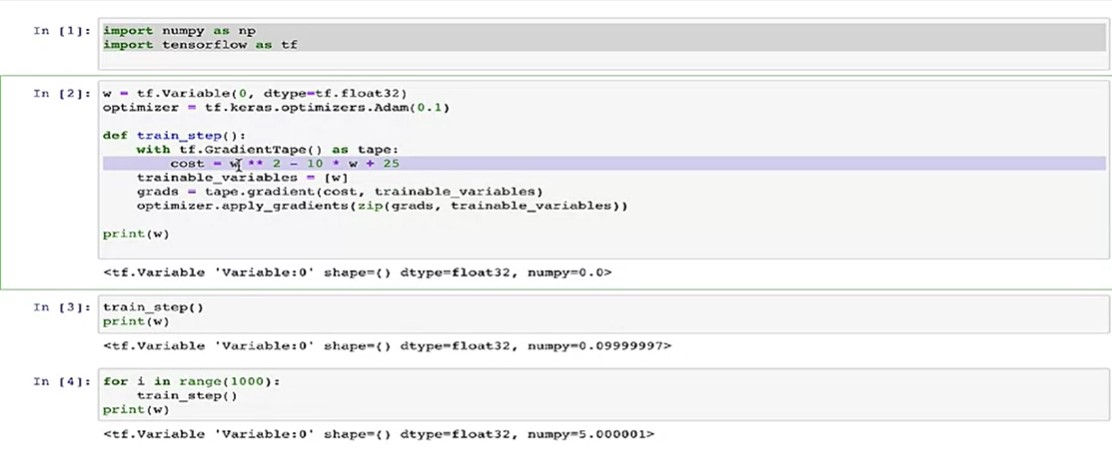

Now let's define a training step function to loop over. In order to carry out one iteration of training, you have to define what are the trainable variables. Trainable variables is just a list with only w.
     
     trainable_variables = [w]
     
We are then going to compute the gradients with:
     
     grads = tape.gradients(cost, trainable_variables)
     
Having done this, you can now use the optimizer to apply the gradients and trainable variables. The syntax we are going to use, is:
       
       optimizer.apply_gradients(zip(grads, trainable_variables))
     
     we're actually going to use the zip functions, built-in Python function, to take the list of gradients and the lists of trainable variables and pair them up so that the gradients and zip the function just takes two lists and pairs up the corresponding elements.

    When we type print(w) here just to print the initial value of w, we've not actually run train_step yet. W is initially the value of 0, which is what we have initialized it to. 
     
     Now let's run one step of our little learning algorithm and print the new value of w, and now it's increased a little bit from 0 to about 0.1. 
     
     Now let's run 1000 iterations of our train_step. If I run 1000 train steps and print W, Now W is nearly five which we knew was the minimum of this cost function.
     
     Isn't that cool? We just specified the cost function, didn't have to take derivatives and, TensorFlow figured out how to minimize this for us.
     
     I hope this gives you a sense of the broad structure of a TensorFlow program.
         
     Just a couple things to notice, W is the parameter you want to optimize. That's why we declared W as a variable. All we had to do was use a GradientTape to record the order of the sequence of operations needed to compute the cost function, and that was the only problem and TensorFlow could figure out automatically how to take derivatives with respect to the cost function. That's why in TensorFlow, you basically had to only implement the forward prop step, and it will figure out how to do the gradient computation. 
     
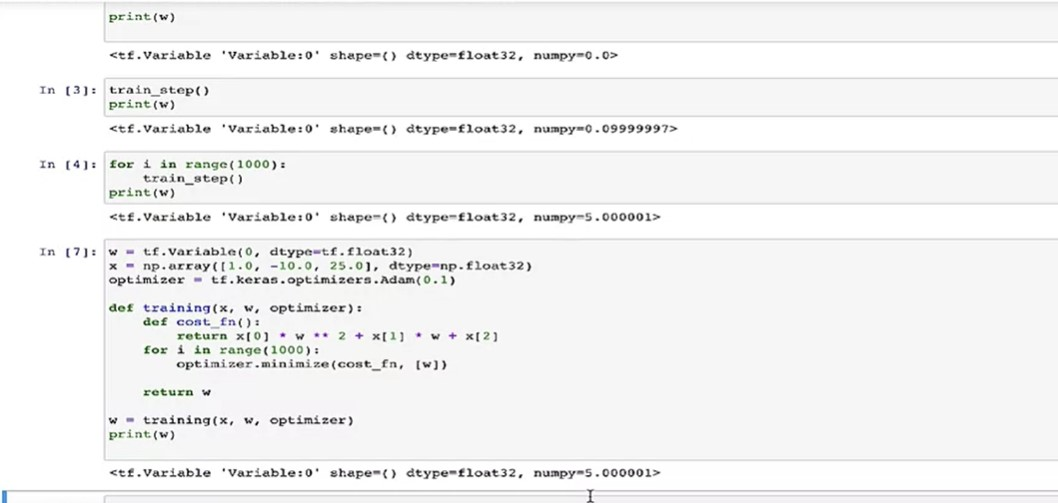

    

       Now, there's one more feature of TensorFlow. In the example we went through so far, the cost function is a fixed function of the parameter or the variable W. But the cost functions you want to minimize is a function of not just W, but also a function of your training data. 
     
     Unless you have some training data X, or (X, Y) and you're training a neural network with a cost function depends on your data, X or (X, Y), as well as the parameters W. How do you get that training data into a TensorFlow program? Let's go through another version of how to implement all this.
     
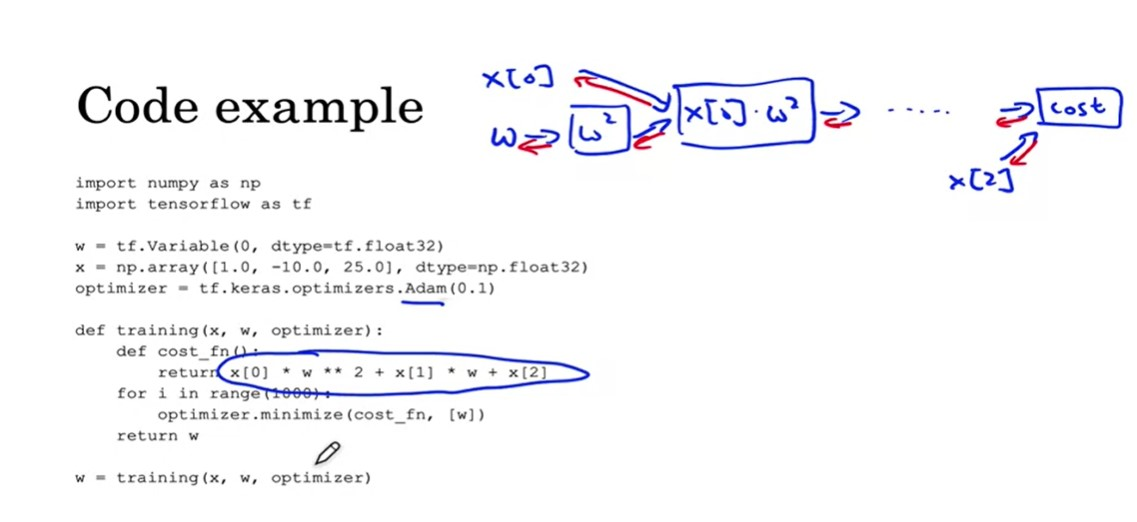

     I'm still going to define W as the variable. Also I'm going to add the optimizer, but now I'm going to define X as a list of numbers as numpy array with (1, -10, 25). This will be another float32. These three numbers, (1, -10, 25), will play the role of the coefficients of the cost function. You can think of X as being the data that controls the coefficients of this quadratic cost function.

       Let me now define the cost function which will minimize as same as before, except that now I'm going to write X[0] times W plus X[1] times w plus X[2]. This is the same cost function as the one above, except that the coefficients are now controlled by this little piece of data X that we have,

       costfunc = X[0] W + X[1] W + X[2]

       Now this cost function computes exactly the same cost function as you had above, except that this little piece of data in the array X controls the coefficients of the quadratic cost function. 

       Now, if you print w this should do nothing because W is still 0, is just initial value. 

       But if you then use the optimizer to take one step of the optimization algorithm, then let's print W again and see if that works. Great, now this has taken one step of Adam Optimization and so W is again roughly 0.1.

       This syntax, optimizer.minimize(costfunct, [W]), that is a simpler alternative piece of syntax which is the same thing as these lines up above with the gradients tape and apply gradients.

       Now that we have a single training set implementation, let's put the whole thing in a loop. Training, X, W optimizer, define the cost function within the scope of this function, and then for I in the range 1000, lets run a thousand iterations and then lets run W.


    Lets see what that does. There you go, and now W is nearly at the minimum, roughly the value of five. Hopefully this gives you a sense of what TensorFlow can do, and the thing that makes it so powerful is, all you need to do is specify how to compute the cost function, and then it takes derivatives and it can apply an optimizer with pretty much just one or two lines of codes. 


    The heart of the TensorFlow program is something to compute the cost, and then TensorFlow automatically figures out the derivatives and how to minimize the cost. What this line of code is doing is allowing TensorFlow to construct a computation graph.It'll automatically be able to figure out all the necessary backward steps needed to implement back-prop. Isn't that nice? 
    
    That's why you don't need to explicitly implement back-prop, TensorFlow figures it out for you. This is one of the things that makes the programming frameworks help you become really efficient and there are also a lot of things you can change with just one line of codes. For example, if you don't want to use the Adam Optimizer and you want to use a different one, then just change this one line of code and you can quickly swap it out for a different optimization algorithm.
    
    All of the popular modern deep learning programming frameworks support things like these and it makes it much easier to develop even pretty complex neural networks. I hope that gave you a sense of the typical structure of a TensorFlow program.
    
    To recap material from this week, you saw how to systematically organize the hyperparameter search process. You also saw batch normalization and how you can use that to speed up your neural network training, and also softmax regression. We also chatted about deep learning and programming frameworks, and you learned about TensorFlow.

### Lab in next notebook